<a href="https://colab.research.google.com/github/TimH2024/MSC-M5-Project/blob/main/2_Std_dataset_data_Analysis_of_merged_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data analysis of the merged dataset, checking for completeness of the dataset, data trends and graphical analysis

---

#LOAD LIBRARIES

In [ ]:

!pip install tensorflow
!pip install scikeras

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import uniform, randint
import warnings

# Suppress user warnings
warnings.filterwarnings('ignore')

# Adjust settings to display all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns


# LOAD THE DATA SETS

In [ ]:
# Import the required modules
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define the file path to the saved CSV
file_path = '/content/drive/My Drive/Colab Notebooks/M5 Code and Data/Std_Datasetv2.csv'

# Load the dataset into a DataFrame
merged_dataset = pd.read_csv(file_path)

# Verify if the dataset has been loaded successfully
print("Dataset loaded successfully!")
print(f"Shape of the dataset: {merged_dataset.shape}")
print(f"First 5 rows of the dataset:\n{merged_dataset.head()}")

Mounted at /content/drive
Dataset loaded successfully!
Shape of the dataset: (109851, 25)
First 5 rows of the dataset:
   saleable_area(ft^2)  unit_rate                       district  floor  CPI  \
0                  423      15792  Kowloon Kowloon City District   22.0    0   
1                 2190      34703  Kowloon Kowloon City District    7.0    0   
2                  761      15857  Kowloon Kowloon City District   12.0    0   
3                  320      13717  Kowloon Kowloon City District   12.0    0   
4                  519      16541  Kowloon Kowloon City District   29.0    0   

    PC  IR  MW  M3  SD  UR  GDP  CI    HSI  LTV    HS  SOLD  PG  LS  \
0  351   3  18  17   0   3   90  66  20400    1  2184  4968   0   0   
1  351   3  18  17   0   3   90  66  20400    1  2184  4968   0   0   
2  351   3  18  17   0   3   90  66  20400    1  2184  4968   0   0   
3  351   3  18  17   0   3   90  66  20400    1  2184  4968   0   0   
4  351   3  18  17   0   3   90  66  20400   

In [ ]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109851 entries, 0 to 109850
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   saleable_area(ft^2)  109851 non-null  int64  
 1   unit_rate            109851 non-null  int64  
 2   district             109851 non-null  object 
 3   floor                109851 non-null  float64
 4   CPI                  109851 non-null  int64  
 5   PC                   109851 non-null  int64  
 6   IR                   109851 non-null  int64  
 7   MW                   109851 non-null  int64  
 8   M3                   109851 non-null  int64  
 9   SD                   109851 non-null  int64  
 10  UR                   109851 non-null  int64  
 11  GDP                  109851 non-null  int64  
 12  CI                   109851 non-null  int64  
 13  HSI                  109851 non-null  int64  
 14  LTV                  109851 non-null  int64  
 15  HS               

In [ ]:
# It seems that when saving and reopening your data, the FormattedDate column lost its datetime64[ns] type and was converted back to object (string).
import pandas as pd

# Convert FormattedDate column back to datetime
merged_dataset['FormattedDate'] = pd.to_datetime(merged_dataset['FormattedDate'], errors='coerce')

# Check if the conversion was successful
print(merged_dataset['FormattedDate'].dtypes)  # Should print datetime64[ns]

# Optional: Drop rows with invalid or missing dates after conversion
merged_dataset = merged_dataset.dropna(subset=['FormattedDate'])

# Check for any invalid conversions
if merged_dataset['FormattedDate'].isnull().sum() > 0:
    print("There are invalid dates in the dataset.")
else:
    print("All dates are valid.")

datetime64[ns]
All dates are valid.


In [ ]:
# Get the files from GitHub raw URLs for the datasets
# dataset_url = 'https://raw.githubusercontent.com/TimH2024/MSC-M5-Project/main/Datasetv2.csv'
# property_dataset_url = 'https://raw.githubusercontent.com/TimH2024/MSC-M5-Project/main/Property_data_raw_2.csv'

# Read in the data sets
# dataset = pd.read_csv(dataset_url)
# property_dataset = pd.read_csv(property_dataset_url)

In [ ]:
# Get the files from GitHub raw URLs for the datasets
property_dataset_url = 'https://raw.githubusercontent.com/TimH2024/MSC-M5-Project/main/Property_data_raw_2.csv'

# Read in the data set
property_dataset = pd.read_csv(property_dataset_url)


# DATA ANALYSIS


# DATABASE INCOMPLETNESS

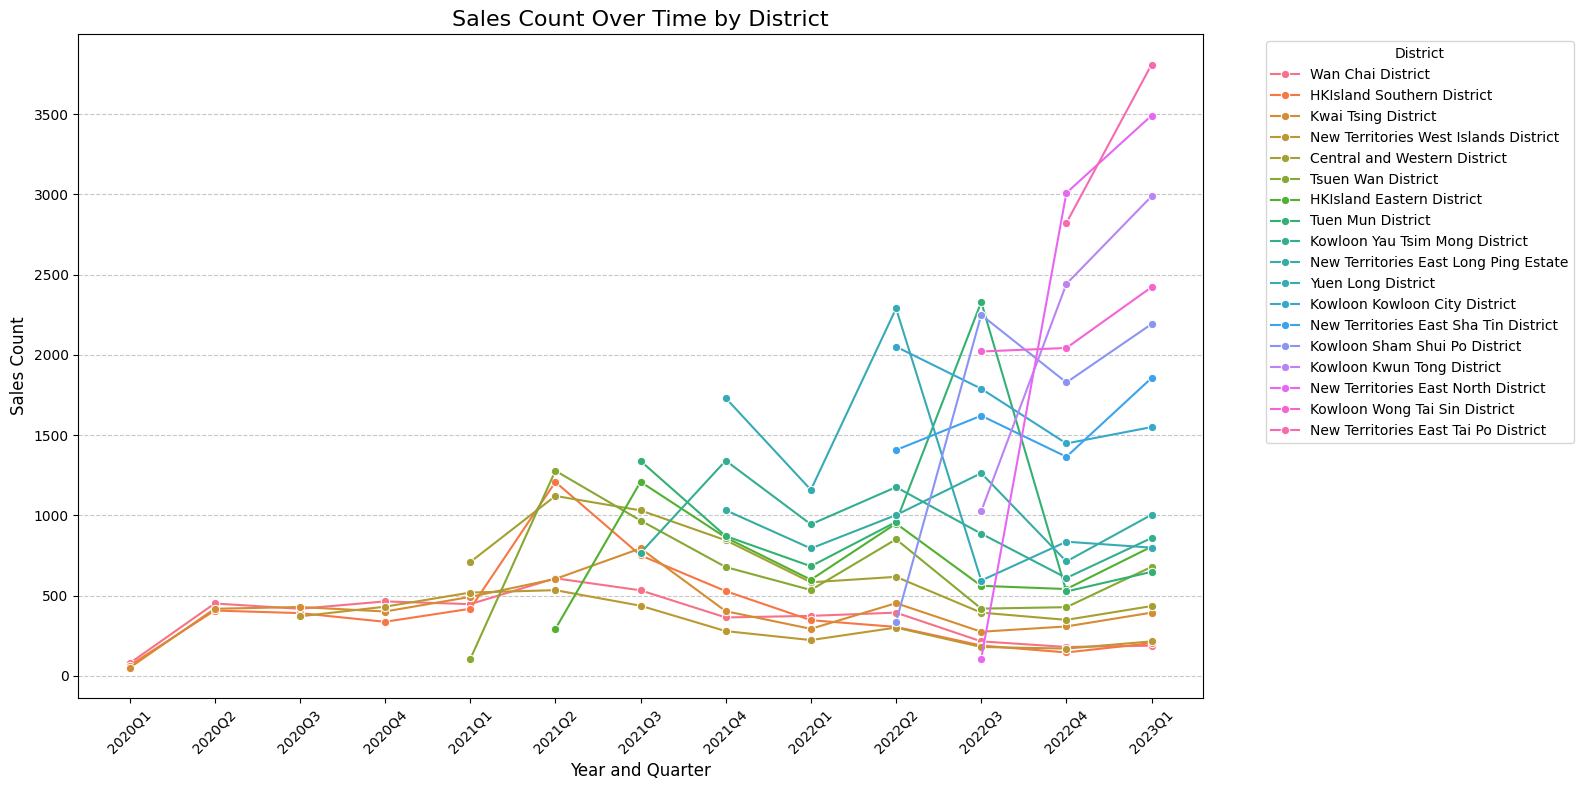

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by 'district' and 'YearQuarter'
grouped_data = merged_dataset.groupby(['district', 'YearQuarter']).agg(
    Sales_Count=('new_price', 'count')  # Count of sales
).reset_index()

# Convert 'YearQuarter' to a proper datetime-like format for sorting
grouped_data['YearQuarter_Sort'] = pd.to_datetime(
    grouped_data['YearQuarter'].str[:4] + '-' +  # Year
    grouped_data['YearQuarter'].str[5:].replace({'Q1': '01', 'Q2': '04', 'Q3': '07', 'Q4': '10'})  # Start month of each quarter
)

# Sort the data by 'YearQuarter_Sort'
grouped_data = grouped_data.sort_values(by='YearQuarter_Sort').reset_index(drop=True)

# Plot Sales Count Over Time
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=grouped_data,
    x='YearQuarter',
    y='Sales_Count',
    hue='district',
    marker='o'
)
plt.title('Sales Count Over Time by District', fontsize=16)
plt.xlabel('Year and Quarter', fontsize=12)
plt.ylabel('Sales Count', fontsize=12)
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

The lack of early data in early years (2020) and uneven distribution across districts may cause bias as ML models may overfit well-represented areas, disproportionately influencing predictions. Sparse data in some areas will hinders learning by providing insufficient context for trends, especially for underrepresented districts or time periods. This dat could skewing predictions toward trends in overrepresented areas and neglecting sparse regions.

In [ ]:
# Display the first 5 values of the 'new_price' column
print("First 5 new_price values in merged_dataset:")
print(merged_dataset['new_price'].head(5))

First 5 new_price values in merged_dataset:
0     6680016
1    75999570
2    12067177
3     4389440
4     8584779
Name: new_price, dtype: int64


In [ ]:
# Look at the sales in each quarter to see what is missing

# Group by district and YearQuarter, calculating number of sales and average price
summary = merged_dataset.groupby(['district', 'YearQuarter']).agg(
    Sales_Count=('new_price', 'count'),  # Count of sales
    Total_Price=('new_price', 'sum')     # Sum of prices
).reset_index()

# Calculate Average Price per YearQuarter
summary['Average_Price'] = summary['Total_Price'] / summary['Sales_Count']

# Convert Average_Price to HK$ million
summary['Average_Price'] = summary['Average_Price'] / 1000000

# Create a complete list of all districts and YearQuarters
all_districts = summary['district'].unique()
all_yearquarters = summary['YearQuarter'].unique()

# Create a full grid of all combinations
full_index = pd.MultiIndex.from_product([all_districts, all_yearquarters], names=['district', 'YearQuarter'])
full_summary = pd.DataFrame(index=full_index).reset_index()

# Merge with the summary to fill in "no data" where applicable
final_table = pd.merge(full_summary, summary, on=['district', 'YearQuarter'], how='left')

# Fill NaN values with "no data"
final_table['Sales_Count'].fillna("no data", inplace=True)
final_table['Average_Price'].fillna("no data", inplace=True)
final_table['Total_Price'].fillna("no data", inplace=True)
# Sort by YearQuarter and district
final_table.sort_values(by=['YearQuarter', 'district'], inplace=True)

# Set display option to show all rows
pd.set_option('display.max_rows', None)

# Display the full summary table
#print(final_table[['district', 'YearQuarter', 'Average_Price', 'Sales_Count']])
final_table.head(20)

district YearQuarter Sales_Count  \
9             Central and Western District      2020Q1     no data   
22               HKIsland Eastern District      2020Q1     no data   
35              HKIsland Southern District      2020Q1        64.0   
48           Kowloon Kowloon City District      2020Q1     no data   
61              Kowloon Kwun Tong District      2020Q1     no data   
74           Kowloon Sham Shui Po District      2020Q1     no data   
87           Kowloon Wong Tai Sin District      2020Q1     no data   
100         Kowloon Yau Tsim Mong District      2020Q1     no data   
113                    Kwai Tsing District      2020Q1        50.0   
126  New Territories East Long Ping Estate      2020Q1     no data   
139    New Territories East North District      2020Q1     no data   
152  New Territories East Sha Tin District      2020Q1     no data   
165   New Territories East Tai Po District      2020Q1     no data   
178  New Territories West Islands District      2020Q1     no data   
191                     Tsuen Wan District      2020Q1     no data   
204                      Tuen Mun District      2020Q1     no data   
217                      Wan Chai District      2020Q1        78.0   
230                     Yuen Long District      2020Q1     no data   
10            Central and Western District      2020Q2     no data   
23               HKIsland Eastern District      2020Q2     no data   

     Total_Price Average_Price  
9        no data       no data  
22       no data       no data  
35   925014605.0     14.453353  
48       no data       no data  
61       no data       no data  
74       no data       no data  
87       no data       no data  
100      no data       no data  
113  289081798.0      5.781636  
126      no data       no data  
139      no data       no data  
152      no data       no data  
165      no data       no data  
178      no data       no data  
191      no data       no data  
204      no data       no data  
217  868382846.0     11.133113  
230      no data       no data  
10       no data       no data  
23       no data       no data

YearQuarter                            2020Q1  2020Q2  2020Q3  2020Q4  2021Q1  \
district                                                                        
Central and Western District                0       0       0       0       1   
HKIsland Eastern District                   0       0       0       0       0   
HKIsland Southern District                  1       1       1       1       1   
Kowloon Kowloon City District               0       0       0       0       0   
Kowloon Kwun Tong District                  0       0       0       0       0   
Kowloon Sham Shui Po District               0       0       0       0       0   
Kowloon Wong Tai Sin District               0       0       0       0       0   
Kowloon Yau Tsim Mong District              0       0       0       0       0   
Kwai Tsing District                         1       1       1       1       1   
New Territories East Long Ping Estate       0       0       0       0       0   
New Territories East North D

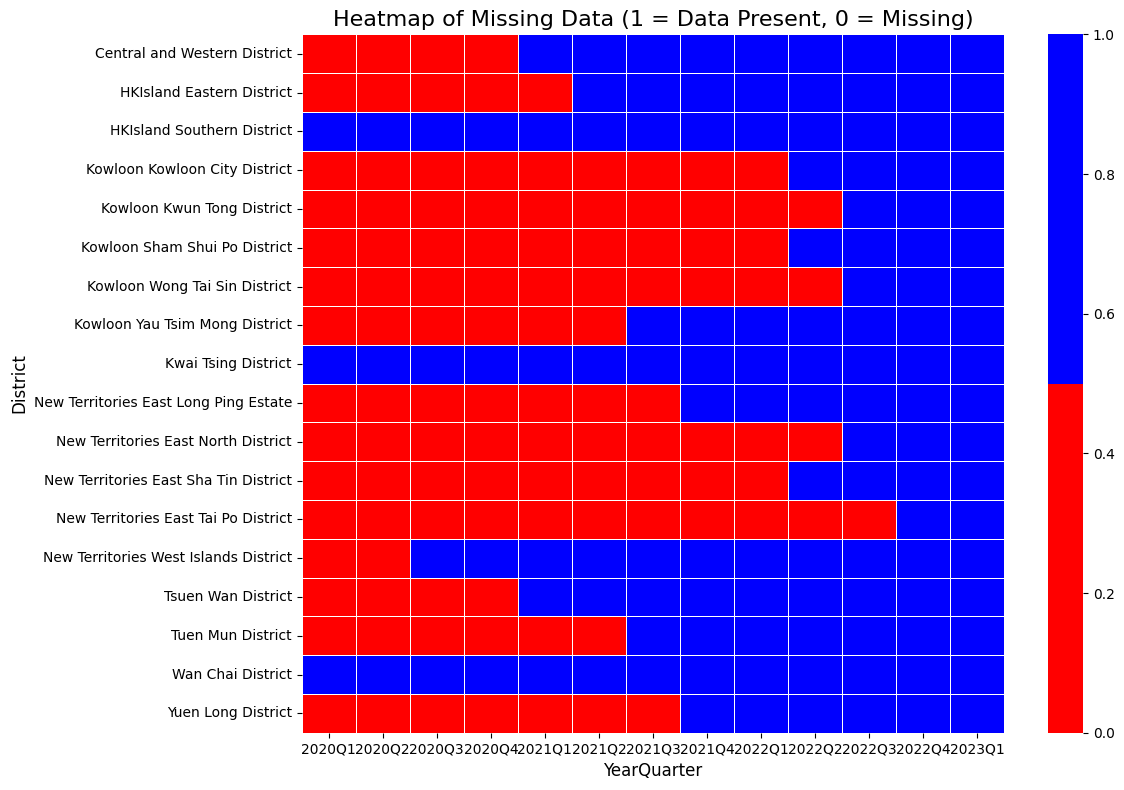

In [ ]:
# Heatmap of missing data in Districts vs YearQuarters
from matplotlib.colors import ListedColormap  # Import ListedColormap

# Replace "no data" with NaN for easier manipulation
final_table['Sales_Count'] = final_table['Sales_Count'].replace("no data", pd.NA)

# Create a matrix to show where data is missing
missing_data_matrix = final_table.pivot(index='district', columns='YearQuarter', values='Sales_Count')

# Convert the missing data to a binary format: 1 for data present, 0 for missing
binary_missing_data = missing_data_matrix.notna().astype(int)

# Display the first 20 rows of the binary matrix (optional, for checking)
print(binary_missing_data.head(20))

# Define a custom colormap: red for 0 (missing data), blue for 1 (data present)
colors = ['#ff0000', '#0000ff']  # Red for missing data, blue for data present
cmap = ListedColormap(colors)

# Plot the heatmap to visualize missing data
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(binary_missing_data, cmap=cmap, cbar=True, linewidths=0.5,
            linecolor='white', xticklabels=True, yticklabels=True)

# Add labels and title
plt.title('Heatmap of Missing Data (1 = Data Present, 0 = Missing)', fontsize=16)
plt.xlabel('YearQuarter', fontsize=12)
plt.ylabel('District', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

The heatmap reveals significant data gaps in early quarters (e.g., 2020 Q1–2021 Q4), particularly for districts like Tsuen Wan and Tuen Mun. Well-represented districts, such as Wan Chai, may dominate model learning. Imputation or removal ensures accurate ML predictions.

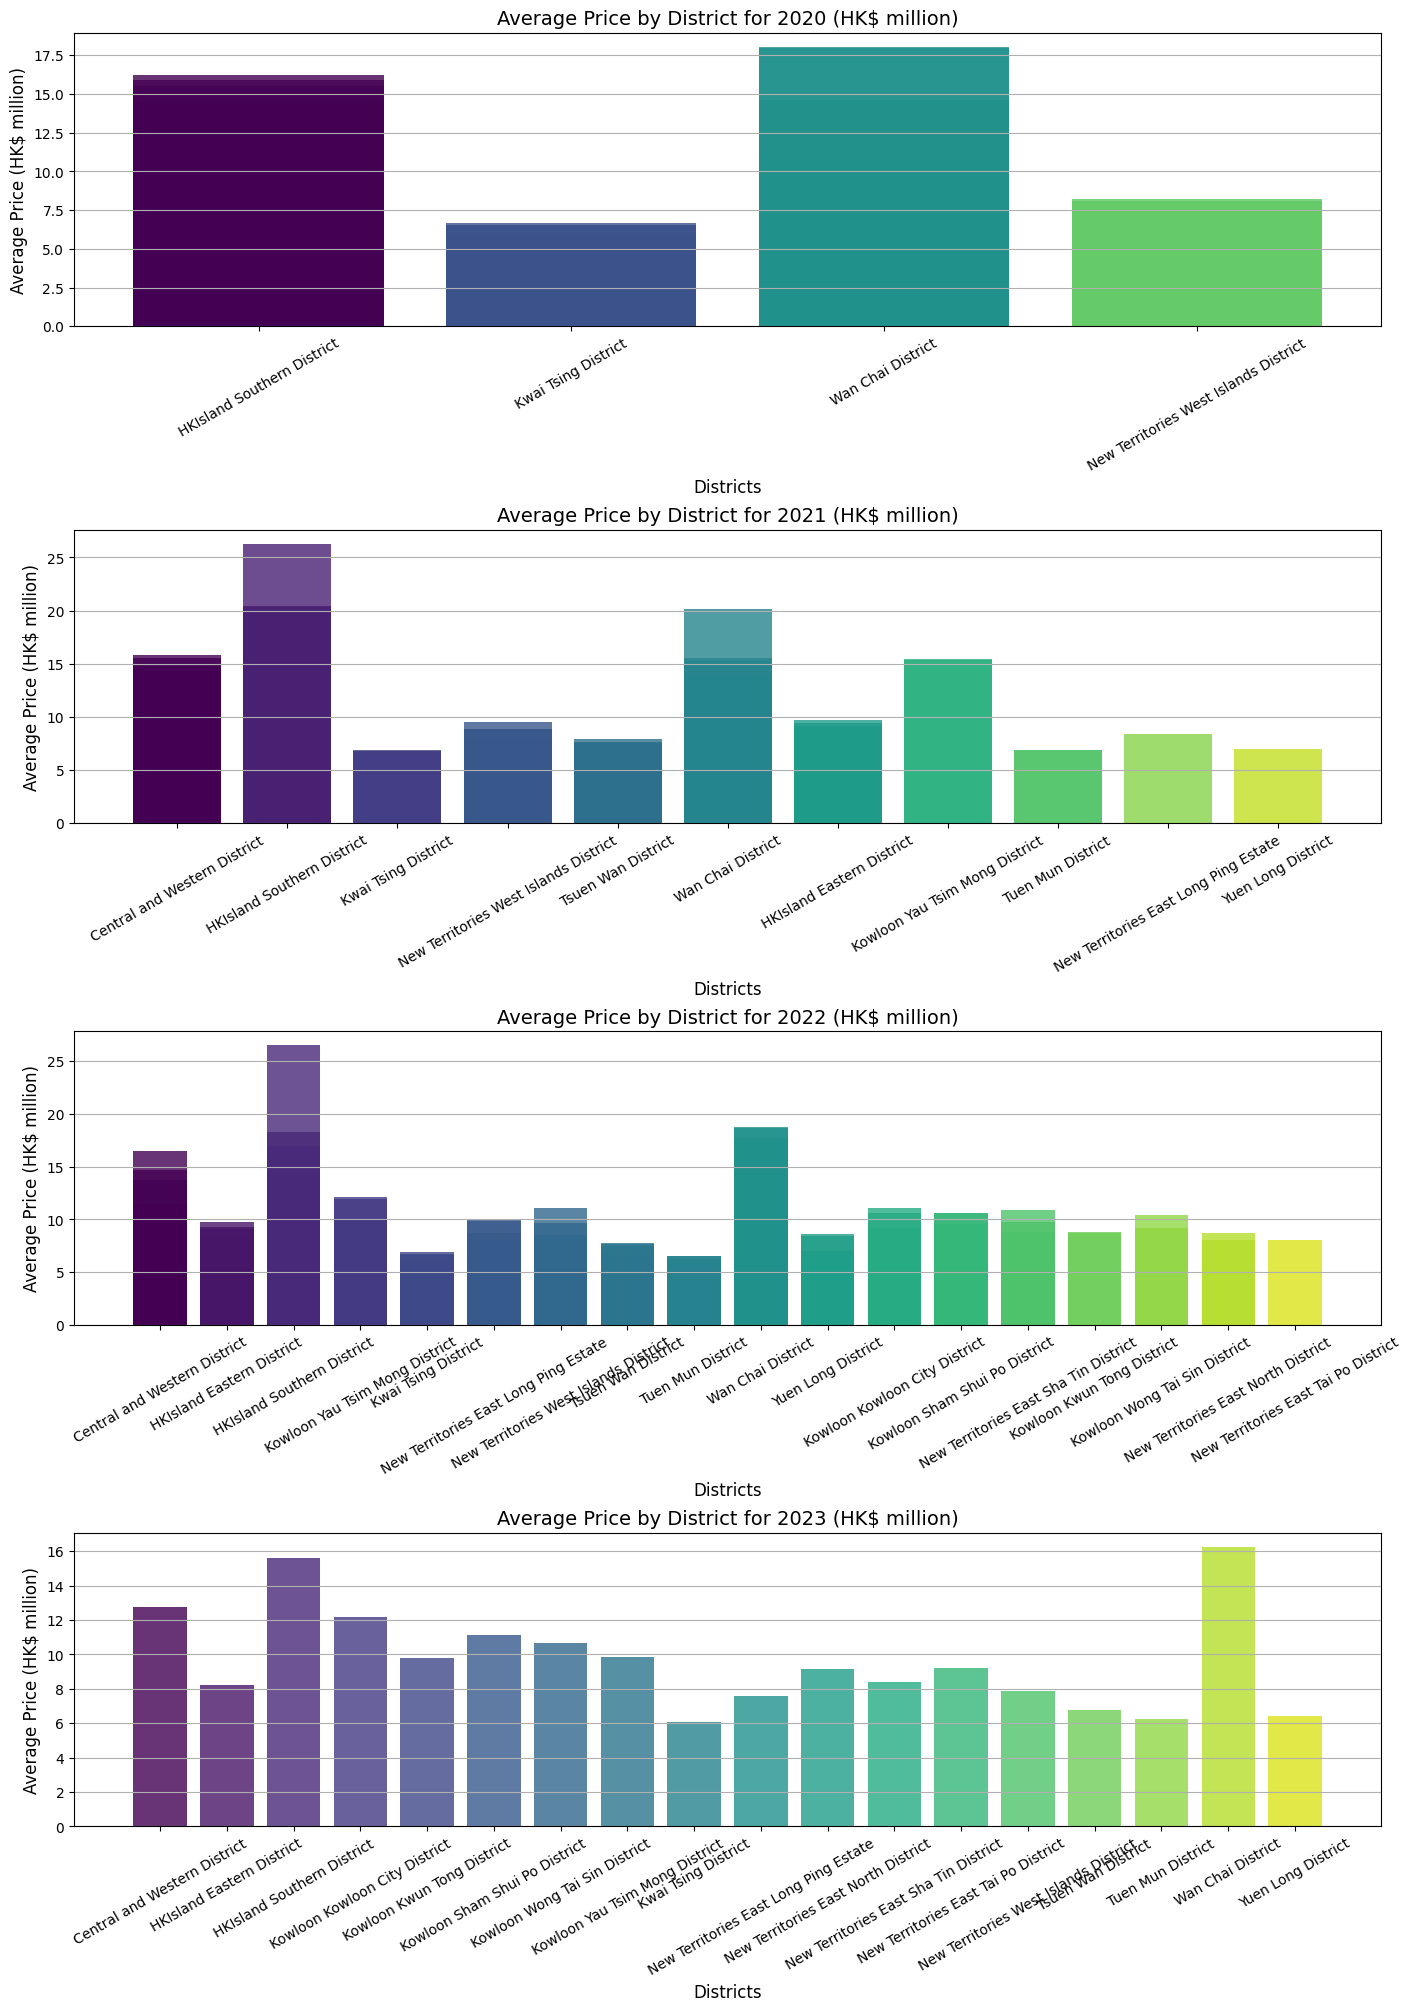

In [ ]:
# Districts over the years
# Filter out rows with "no data" in Average_Price and convert to float
plot_data = final_table[final_table['Average_Price'] != "no data"].copy()
plot_data['Average_Price'] = plot_data['Average_Price'].astype(float)

# Extract the Year from YearQuarter for grouping
plot_data['Year'] = plot_data['YearQuarter'].astype(str).str[:4]  # Get the first 4 characters for the year

# Get the list of unique years for subplots
years = plot_data['Year'].unique()

# Set up the subplots for vertical stacking
fig, axes = plt.subplots(len(years), 1, figsize=(14, 5 * len(years)), constrained_layout=True)

# Use a colormap for unique colors
color_map = plt.cm.viridis

# If there's only one year, axes will not be an array, handle that case
if len(years) == 1:
    axes = [axes]  # Wrap it in a list to iterate consistently

# Loop through each year and plot on separate subplots
for i, year in enumerate(years):
    # Filter data for the current year
    year_data = plot_data[plot_data['Year'] == year]

    # Assign unique colors to each district
    colors = [color_map(idx / len(year_data['district'].unique())) for idx in range(len(year_data['district'].unique()))]
    district_color_map = {district: colors[idx] for idx, district in enumerate(year_data['district'].unique())}

    # Plotting with unique colors
    axes[i].bar(year_data['district'], year_data['Average_Price'],
                color=[district_color_map[district] for district in year_data['district']], alpha=0.8)

    # Adding labels and title
    axes[i].set_title(f'Average Price by District for {year} (HK$ million)', fontsize=14)
    axes[i].set_xlabel('Districts', fontsize=12)
    axes[i].set_ylabel('Average Price (HK$ million)', fontsize=12)
    axes[i].tick_params(axis='x', rotation=30, labelsize=10)  # Rotate x-axis labels for better alignment
    axes[i].grid(axis='y')

# Show the final plot
plt.show()

The graphs show significant price variations across districts and years, with sparse data in early years 2020 to 2021, likely due to COVID-19 disruptions. By 2023, most districts report complete data. Some high-priced districts (e.g., Central and Western) dominate the market, skewing the dataset. This imbalance could bias machine learning models toward wealthier areas, requiring normalization and imputation to ensure accurate, fair predictions across all districts and time periods.

In [ ]:
# Display the first 5 values of the 'new_price' column
print("First 5 new_price values in merged_dataset:")
print(merged_dataset['new_price'].head(5))

First 5 new_price values in merged_dataset:
0     6680016
1    75999570
2    12067177
3     4389440
4     8584779
Name: new_price, dtype: int64


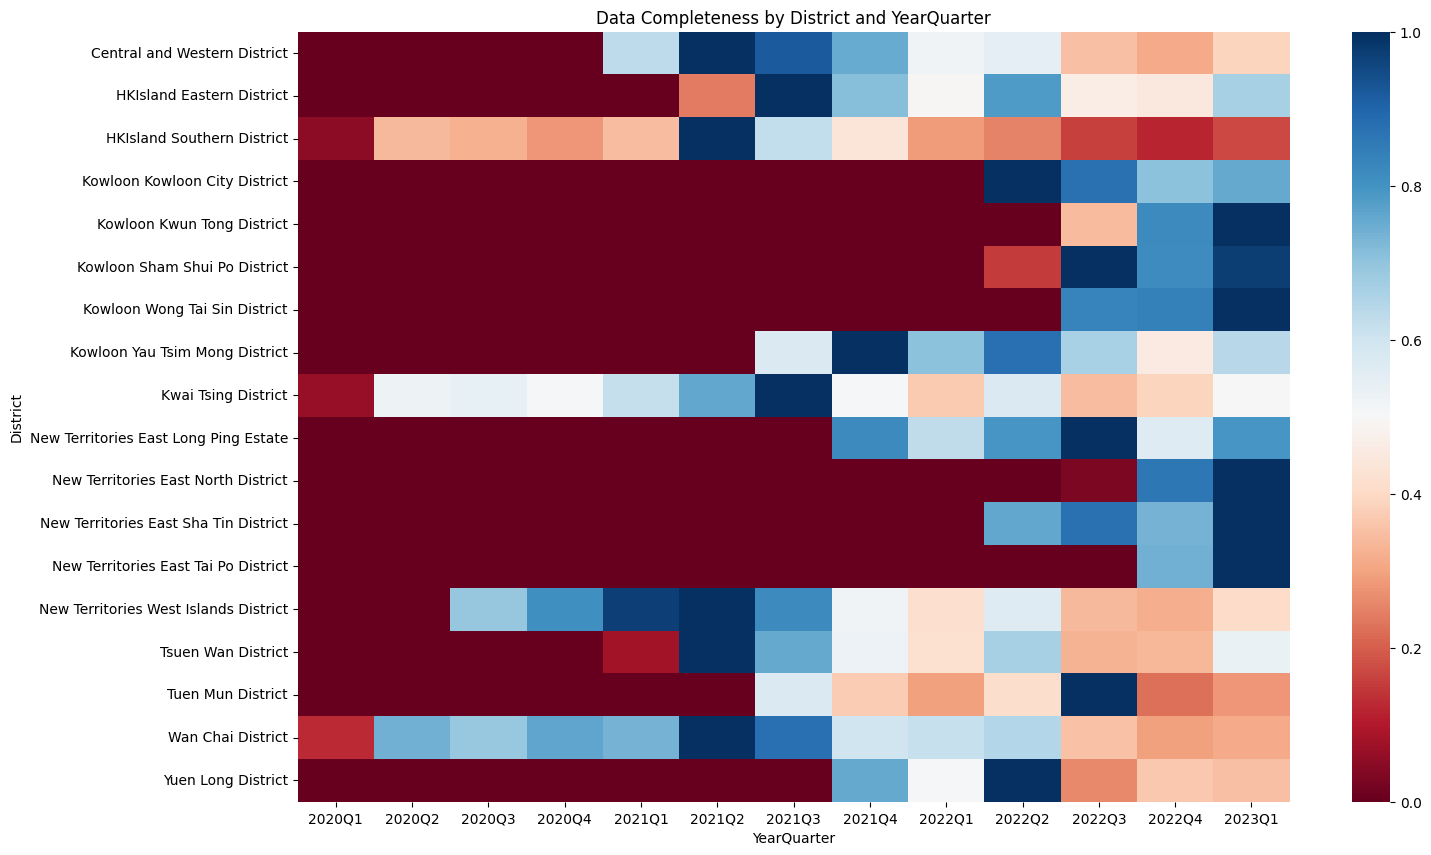

In [ ]:
# Assessing data completeness
# Load your dataset (ensure `merged_dataset` is already imported)
# Assuming `merged_dataset` is the dataset displayed in your screenshot

# Step 1: Create a pivot table to calculate data completeness
data_completeness = (
    merged_dataset
    .groupby(['district', 'YearQuarter'])['saleable_area(ft^2)']  # Use a key column like 'saleable_area(ft^2)' to check for non-null values
    .count()  # Count non-null values
    .unstack(fill_value=0)  # Create a pivot table with 'district' as rows and 'YearQuarter' as columns
)

# Step 2: Convert counts to a fraction of total rows per district and quarter
# Assume that at least one entry per district/quarter is required for full data presence
data_completeness_fraction = data_completeness.apply(lambda row: row / row.max(), axis=1)

# Step 3: Plot the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(data_completeness_fraction, annot=False, cmap="RdBu", cbar=True)
plt.title("Data Completeness by District and YearQuarter")
plt.xlabel("YearQuarter")
plt.ylabel("District")
plt.show()

# Optional: Save the data completeness fraction to a CSV for further analysis
data_completeness_fraction.to_csv("data_completeness_fraction.csv")

From the abve early quarters (2020 Q1–Q3) exhibit substantial gaps across most districts, which could hinder time-series modeling due to insufficient data for trend analysis. Districts like HKIsland Southern,Kwai Tsing, and Wan Chai show better completeness in early periods, while others, such as New Territories East Long Ping Estate and Yuen Long District, remain sparse even in later quarters.

From 2021 onward, data completeness improves, with most districts achieving nearly full coverage.

Incomplete data can lead to challenges such as overfitting, biased predictions, or reduced model generalizability. To mitigate this, focus on later periods, impute missing data cautiously, and exclude districts with excessive gaps to enhance model performance.

In [ ]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109851 entries, 0 to 109850
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   saleable_area(ft^2)  109851 non-null  int64         
 1   unit_rate            109851 non-null  int64         
 2   district             109851 non-null  object        
 3   floor                109851 non-null  float64       
 4   CPI                  109851 non-null  int64         
 5   PC                   109851 non-null  int64         
 6   IR                   109851 non-null  int64         
 7   MW                   109851 non-null  int64         
 8   M3                   109851 non-null  int64         
 9   SD                   109851 non-null  int64         
 10  UR                   109851 non-null  int64         
 11  GDP                  109851 non-null  int64         
 12  CI                   109851 non-null  int64         
 13  HSI           

In [ ]:
# Drop the unnecessary columns from the DataFrame
merged_dataset = merged_dataset.drop(columns=["price_bucket", "is_outlier"], errors="ignore")


# SOLD TOTALS & TRENDS

In [ ]:

# Total propeties sold in HK Vs loaded DataFrame

# Filter the SOLD row (row where 'Unnamed: 0' is 'SOLD') and exclude the last 3 quarters
sold_row = property_dataset.loc[property_dataset['Unnamed: 0'] == 'SOLD'].iloc[0, 1:-3]  # Exclude last 3 columns (quarters)

# Sum the SOLD values excluding the last 3 quarters
adjusted_sold_sum = sold_row.sum()

# Get the total number of rows in merged_dataset
total_rows_merged_dataset = len(merged_dataset)

# Calculate the percentage (merged_dataset rows as a percentage of the adjusted SOLD sum)
percentage_merged_to_sold = (total_rows_merged_dataset / adjusted_sold_sum) * 100

# Print the results
print(f"Adjusted SOLD properties (excluding last 3 quarters): {adjusted_sold_sum}")
print(f"Total rows in 'merged_dataset': {total_rows_merged_dataset}")
print(f"Percentage of rows in 'merged_dataset' compared to adjusted SOLD properties: {percentage_merged_to_sold:.2f}%")

Adjusted SOLD properties (excluding last 3 quarters): 243585.0
Total rows in 'merged_dataset': 109851
Percentage of rows in 'merged_dataset' compared to adjusted SOLD properties: 45.10%


Based on the above, the number of properties recorded as sold by Govt is `243,585` but the using the sliimed down Centreline database we have `74,152` in the same period, so it does not record ALL the property transactions in that period - just 30.44%

<Figure size 1200x600 with 0 Axes>

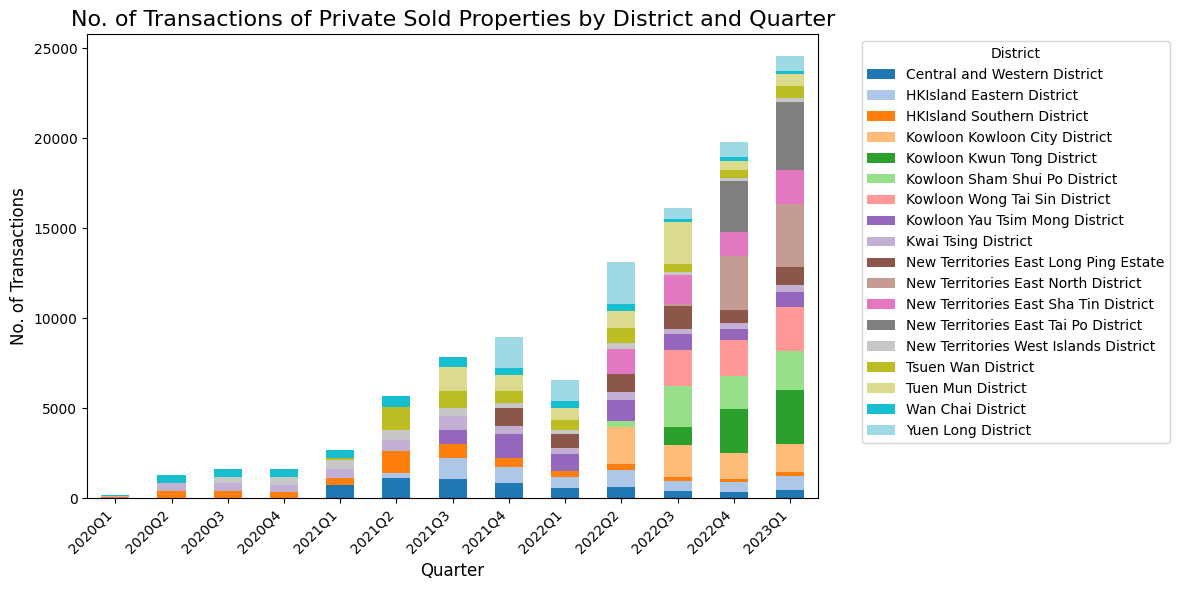

In [ ]:
# Group by YearQuarter and district, then count transactions
tcount_sold_by_district = merged_dataset.groupby(['YearQuarter', 'district']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
plt.figure(figsize=(12, 6))
tcount_sold_by_district.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

# Customizing the plot
plt.title('No. of Transactions of Private Sold Properties by District and Quarter', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('No. of Transactions', fontsize=12)
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

# PRICE

In [ ]:
merged_dataset.columns

Index(['saleable_area(ft^2)', 'unit_rate', 'district', 'floor', 'CPI', 'PC',
       'IR', 'MW', 'M3', 'SD', 'UR', 'GDP', 'CI', 'HSI', 'LTV', 'HS', 'SOLD',
       'PG', 'LS', 'FormattedDate', 'new_price', 'YearQuarter', 'region',
       'floor_height', 'floor_size'],
      dtype='object')

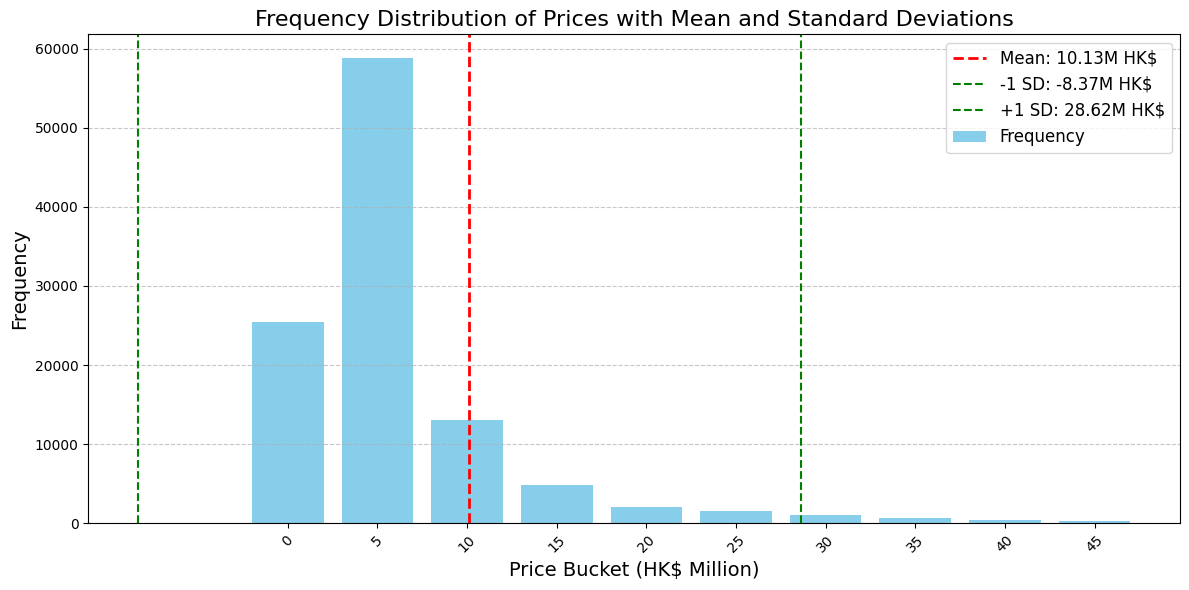

In [ ]:

# Create buckets of 5 million HK$ increments
bucket_size = 5  # Bucket size in million HK$
merged_dataset['price_bucket'] = np.floor(merged_dataset['new_price'] / (bucket_size * 1e6)) * bucket_size

# Group by price_bucket and calculate frequency
frequency_data = (
    merged_dataset
    .groupby('price_bucket')
    .size()
    .reset_index(name='frequency')
    .sort_values(by='price_bucket')
)

# Calculate mean and standard deviation of the prices (in HK$ million)
mean_price = merged_dataset['new_price'].mean() / 1e6  # Convert to HK$ million
std_price = merged_dataset['new_price'].std() / 1e6  # Convert to HK$ million

# Filter the frequency data to focus on values within ±2 standard deviations from the mean
min_bucket = max(0, mean_price - 2 * std_price)  # Avoid negative buckets
max_bucket = mean_price + 2 * std_price
filtered_data = frequency_data[
    (frequency_data['price_bucket'] >= min_bucket) &
    (frequency_data['price_bucket'] <= max_bucket)
]

# Plot the frequency distribution
plt.figure(figsize=(12, 6))
plt.bar(filtered_data['price_bucket'], filtered_data['frequency'], width=4, color='skyblue', label='Frequency')

# Overlay mean price and standard deviation ranges
plt.axvline(mean_price, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_price:.2f}M HK$')
plt.axvline(mean_price - std_price, color='green', linestyle='--', linewidth=1.5, label=f'-1 SD: {mean_price - std_price:.2f}M HK$')
plt.axvline(mean_price + std_price, color='green', linestyle='--', linewidth=1.5, label=f'+1 SD: {mean_price + std_price:.2f}M HK$')

# Add chart details
plt.title('Frequency Distribution of Prices with Mean and Standard Deviations', fontsize=16)
plt.xlabel('Price Bucket (HK$ Million)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(filtered_data['price_bucket'], rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
merged_dataset.columns


Index(['saleable_area(ft^2)', 'unit_rate', 'district', 'floor', 'CPI', 'PC',
       'IR', 'MW', 'M3', 'SD', 'UR', 'GDP', 'CI', 'HSI', 'LTV', 'HS', 'SOLD',
       'PG', 'LS', 'FormattedDate', 'new_price', 'YearQuarter', 'region',
       'floor_height', 'floor_size', 'price_bucket'],
      dtype='object')

Based on the above, ther are many price outliers in the dataset, which may represent extremely high-priced properties which many be individual blocks of whole flats rather than individual flats or more likely erroneous low-priced entries. These outliers will distort machine learning models, especially linear and distance-based algorithms, leading to biased predictions and poor performance. Therefore roperties priced above 3 standard deviations (SD) from the mean (e.g., >37.88M HK$) are considered to be errors or unrepresentative of the majority of the data. To improve model accuracy, these outliers should be removed. Additionally, properties with prices ≤0 should also be eliminated as they are invalid entries. Cleaning the dataset by removing these extreme outliers ensures that the model trains on a more representative and reliable dataset.

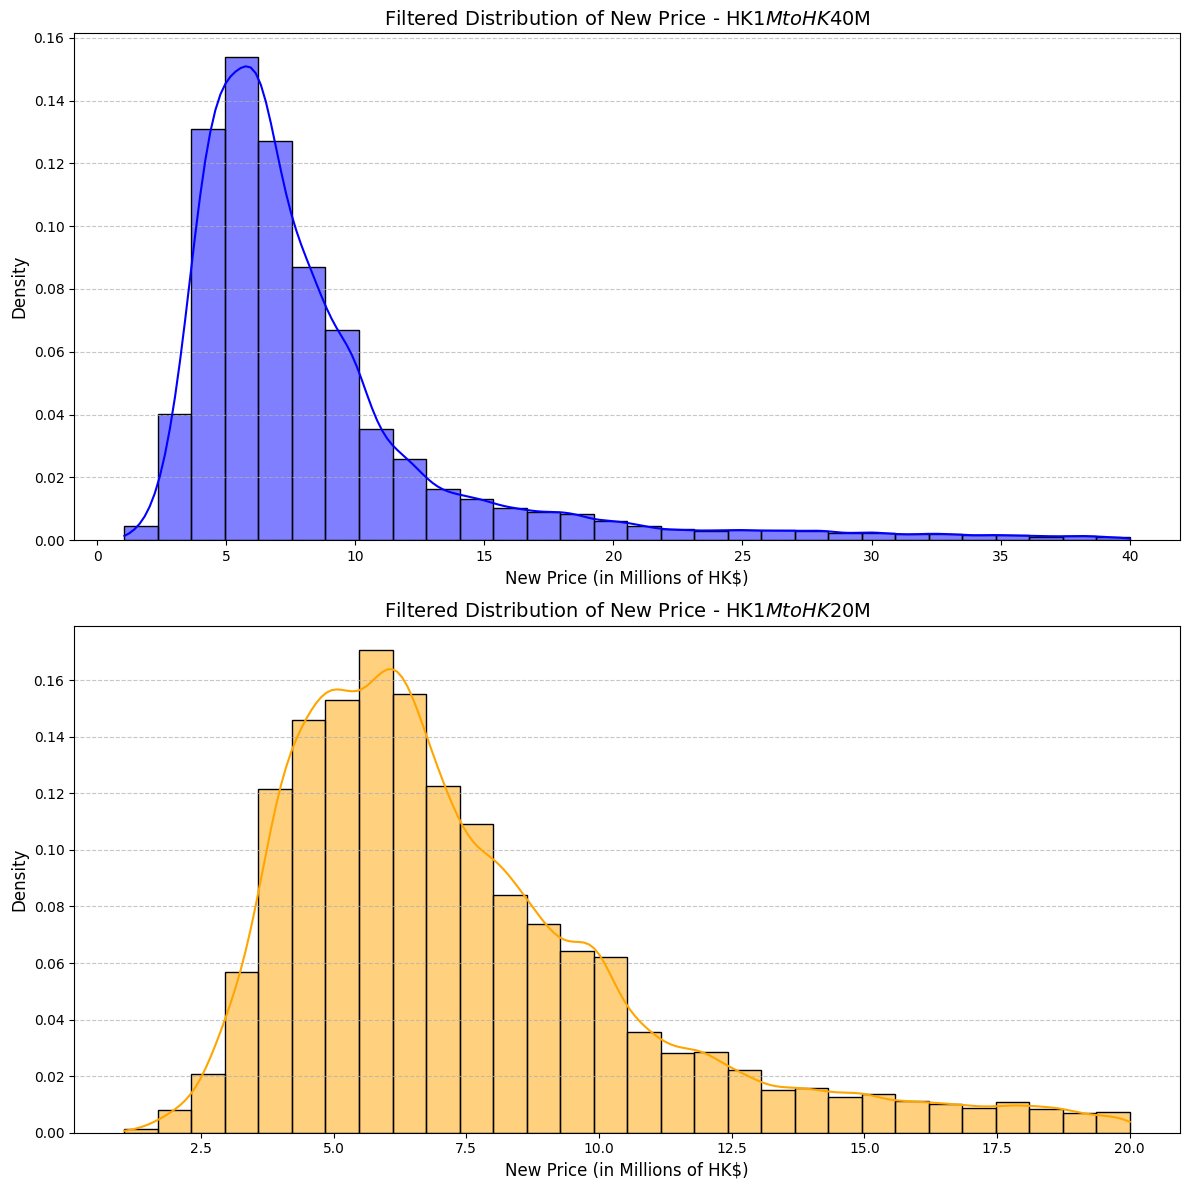

In [ ]:
# Look at the price distribution over certain price ranges
# Check if the column 'new_price' exists
if 'new_price' not in merged_dataset.columns:
    raise ValueError("The column 'new_price' does not exist in the merged_dataset.")

# Filter dataset for new_price between 1,000,000 and 40,000,000
filtered_dataset140 = merged_dataset[(merged_dataset['new_price'] <= 40_000_000) &
                                      (merged_dataset['new_price'] >= 1_000_000)]

# Filter dataset for new_price between 1,000,000 and 20,000,000
filtered_dataset120 = merged_dataset[(merged_dataset['new_price'] <= 20_000_000) &
                                      (merged_dataset['new_price'] >= 1_000_000)]

# Save both datasets to CSV for future use
filtered_dataset140.to_csv('filtered_dataset140.csv', index=False)
filtered_dataset120.to_csv('filtered_dataset120.csv', index=False)

# Convert new_price to millions for plotting in both datasets
filtered_dataset140['new_price_millions'] = filtered_dataset140['new_price'] / 1_000_000
filtered_dataset120['new_price_millions'] = filtered_dataset120['new_price'] / 1_000_000

# Create a figure with two subplots (stacked vertically)
fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=False)

# Plot the distribution for filtered_dataset140
sns.histplot(filtered_dataset140['new_price_millions'], kde=True, bins=30, color='blue', stat="density", ax=axes[0])
axes[0].set_title('Filtered Distribution of New Price - HK$1M to HK$40M', fontsize=14)
axes[0].set_xlabel('New Price (in Millions of HK$)', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot the distribution for filtered_dataset120
sns.histplot(filtered_dataset120['new_price_millions'], kde=True, bins=30, color='orange', stat="density", ax=axes[1])
axes[1].set_title('Filtered Distribution of New Price - HK$1M to HK$20M', fontsize=14)
axes[1].set_xlabel('New Price (in Millions of HK$)', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the combined plot
plt.show()

I consider that the graph (HK$1M to HK$20M) is better for machine learning as it focuses on the majority of data, reduces skewness, and avoids the influence of outliers, making it easier for models to learn patterns. The left graph (HK$1M to HK$40M) is better if your task requires analyzing the entire market, including high-value properties, but it will require preprocessing (e.g., outlier handling or log transformation) to address skewness and imbalance caused by extreme prices.

# PRICE CHANGE

In [ ]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109851 entries, 0 to 109850
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   saleable_area(ft^2)  109851 non-null  int64         
 1   unit_rate            109851 non-null  int64         
 2   district             109851 non-null  object        
 3   floor                109851 non-null  float64       
 4   CPI                  109851 non-null  int64         
 5   PC                   109851 non-null  int64         
 6   IR                   109851 non-null  int64         
 7   MW                   109851 non-null  int64         
 8   M3                   109851 non-null  int64         
 9   SD                   109851 non-null  int64         
 10  UR                   109851 non-null  int64         
 11  GDP                  109851 non-null  int64         
 12  CI                   109851 non-null  int64         
 13  HSI           

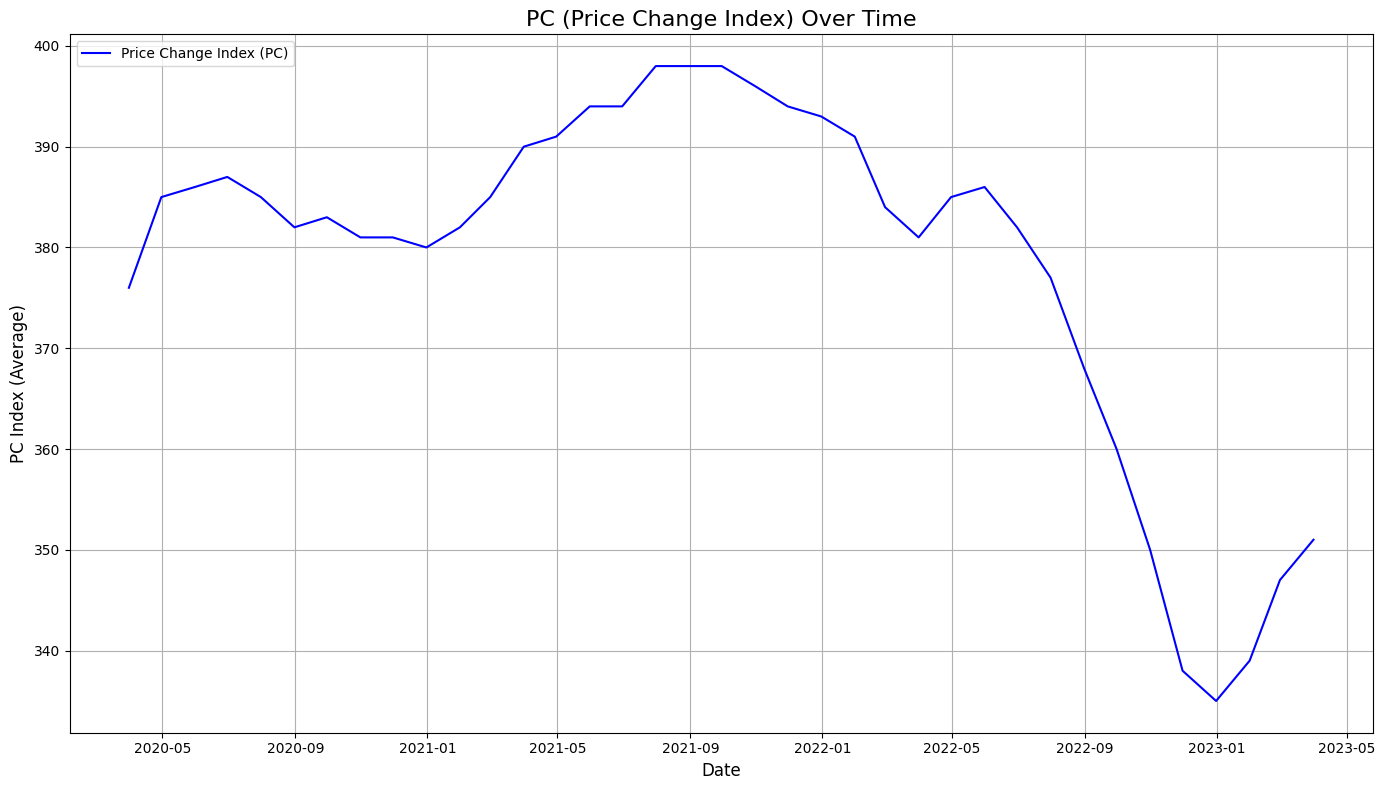

In [ ]:

# Resample PC over time (monthly) using the mean to preserve the index scale
pc_over_time = merged_dataset.resample('M', on='FormattedDate')['PC'].mean()

# Plot the data
plt.figure(figsize=(14, 8))  # Set figure size
plt.plot(pc_over_time.index, pc_over_time, label='Price Change Index (PC)', color='blue')

# Add titles and labels
plt.title('PC (Price Change Index) Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('PC Index (Average)', fontsize=12)
plt.grid(True)  # Add grid for better readability
plt.legend(loc='upper left')  # Legend for the line

# Display the plot
plt.tight_layout()
plt.show()

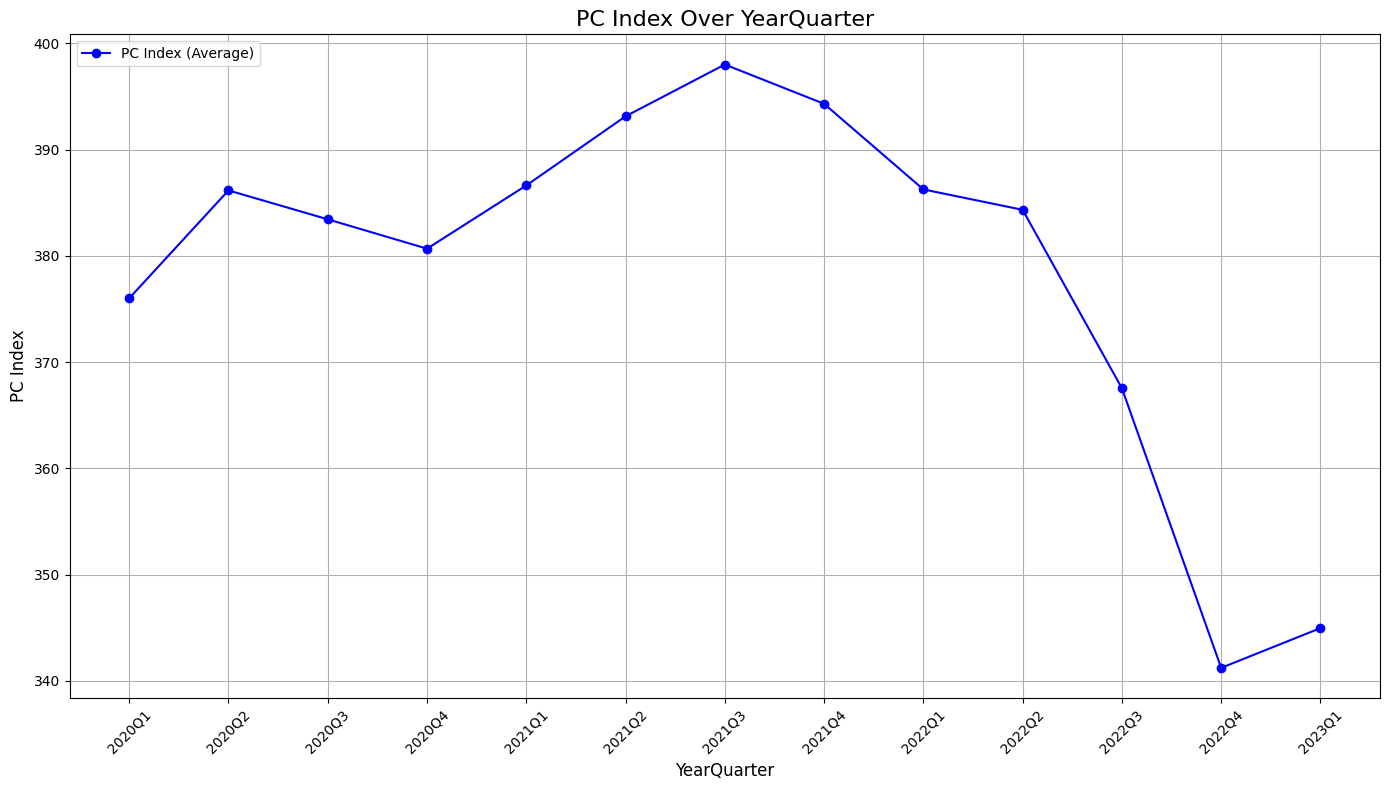

In [ ]:

# Group data by YearQuarter and calculate the average PC index
pc_over_quarters = merged_dataset.groupby('YearQuarter')['PC'].mean()

# Sort the YearQuarter values to ensure proper order
pc_over_quarters = pc_over_quarters.sort_index()

# Plot the data
plt.figure(figsize=(14, 8))  # Set figure size
plt.plot(pc_over_quarters.index, pc_over_quarters, marker='o', label='PC Index (Average)', color='blue')

# Add titles and labels
plt.title('PC Index Over YearQuarter', fontsize=16)
plt.xlabel('YearQuarter', fontsize=12)
plt.ylabel('PC Index', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid for better readability
plt.legend(loc='upper left')  # Legend for the line

# Display the plot
plt.tight_layout()
plt.show()

# UNIT RATE

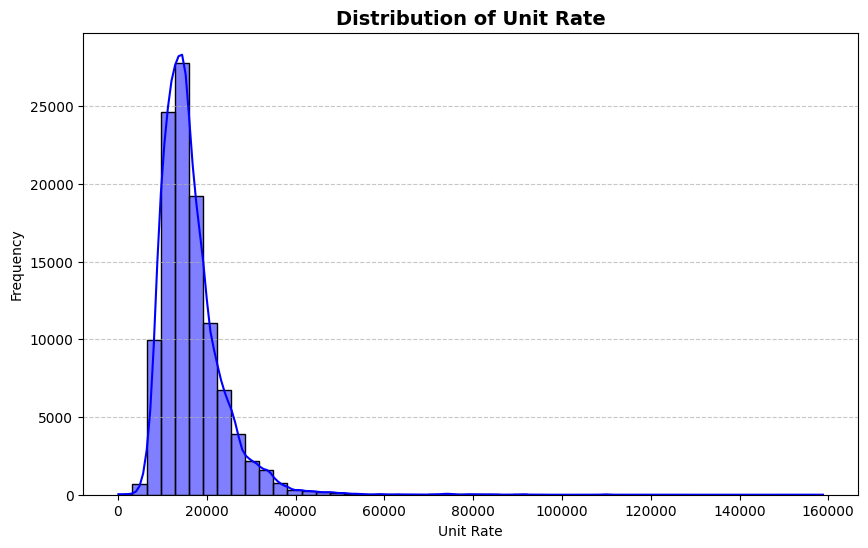

In [ ]:
# Plot the histogram for 'unit_rate'
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_dataset, x='unit_rate', bins=50, kde=True, color='blue')
plt.title('Distribution of Unit Rate', fontsize=14, fontweight='bold')
plt.xlabel('Unit Rate')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The unit Rate distribution is heavily right-skewed, with most values between 5,000 and 25,000 and outliers extending up to 160,000. These outliers, likely luxury properties or data errors, and the wide range make it hard for ML models to generalize. This could be fixed by log transformation or removing outliers to address the skewness. This right skewedness may obscure meaningful associations or lead to overfitting, especially if important patterns in extreme values are lost.

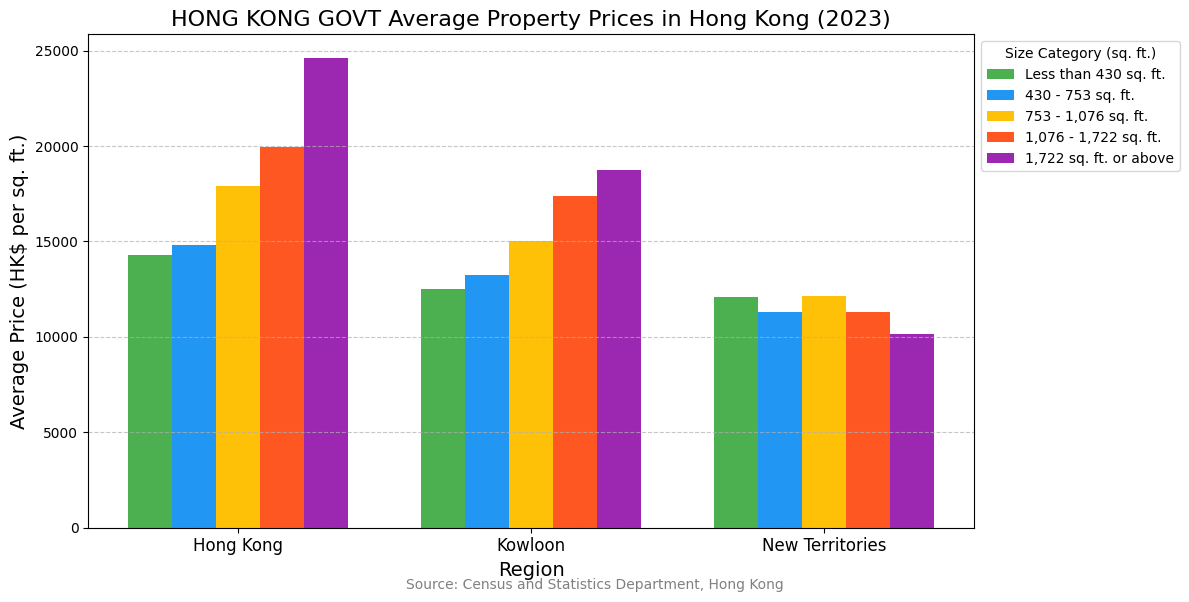

In [ ]:
# Govt data on area price and districts
# Data from the provided table
data = {
    "Type": [
        "Less than 430 sq. ft.",
        "Less than 430 sq. ft.",
        "Less than 430 sq. ft.",
        "430 - 753 sq. ft.",
        "430 - 753 sq. ft.",
        "430 - 753 sq. ft.",
        "753 - 1,076 sq. ft.",
        "753 - 1,076 sq. ft.",
        "753 - 1,076 sq. ft.",
        "1,076 - 1,722 sq. ft.",
        "1,076 - 1,722 sq. ft.",
        "1,076 - 1,722 sq. ft.",
        "1,722 sq. ft. or above",
        "1,722 sq. ft. or above",
        "1,722 sq. ft. or above",
    ],
    "Area/District": [
        "Hong Kong",
        "Kowloon",
        "New Territories",
        "Hong Kong",
        "Kowloon",
        "New Territories",
        "Hong Kong",
        "Kowloon",
        "New Territories",
        "Hong Kong",
        "Kowloon",
        "New Territories",
        "Hong Kong",
        "Kowloon",
        "New Territories",
    ],
    "2023": [
        14314, 12506, 12071,
        14831, 13223, 11315,
        17905, 15028, 12142,
        19972, 17393, 11302,
        24622, 18746, 10141,
    ],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Pivot the data to organize it for plotting
pivot_df = df.pivot(index="Area/District", columns="Type", values="2023")

# Define the size categories and regions
size_categories = [
    "Less than 430 sq. ft.",
    "430 - 753 sq. ft.",
    "753 - 1,076 sq. ft.",
    "1,076 - 1,722 sq. ft.",
    "1,722 sq. ft. or above",
]
regions = ["Hong Kong", "Kowloon", "New Territories"]

# Bar position setup
x = np.arange(len(regions))  # Number of regions
bar_width = 0.15  # Width of each bar
offsets = np.arange(-2, 3) * bar_width  # Offsets for each size category

# Plot the data
plt.figure(figsize=(12, 6))

colors = ["#4CAF50", "#2196F3", "#FFC107", "#FF5722", "#9C27B0"]  # Colors for size categories

for i, size_category in enumerate(size_categories):
    plt.bar(
        x + offsets[i],
        pivot_df[size_category],  # Use the pivoted data for the specific size category
        width=bar_width,
        color=colors[i],
        label=size_category,
    )

# Add labels and legend
plt.title("HONG KONG GOVT Average Property Prices in Hong Kong (2023)", fontsize=16)
plt.xlabel("Region", fontsize=14)
plt.ylabel("Average Price (HK$ per sq. ft.)", fontsize=14)
plt.xticks(x, regions, fontsize=12)
plt.legend(title="Size Category (sq. ft.)", fontsize=10, loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add source at the bottom of the graph
plt.figtext(
    0.5, 0.01,  # Position: centered horizontally (0.5), near the bottom (0.01)
    "Source: Census and Statistics Department, Hong Kong",
    ha="center",  # Horizontal alignment
    fontsize=10,
    color="gray",
)

plt.tight_layout()

# Show the plot
plt.show()

The data provided by the HK government offers a general guide to property prices by region and area, showing trends across property sizes. However, it is smoothed and aggregated, masking outliers and extreme values. **Hong Kong Island** has the highest prices, with small units at **HK$15,000–20,000 per sq. ft.** and larger ones exceeding **HK$25,000 per sq. ft.** **Kowloon** prices range from **HK$13,000–22,000 per sq. ft.**, while the **New Territories** is more affordable at **HK$10,000–16,000 per sq. ft.**

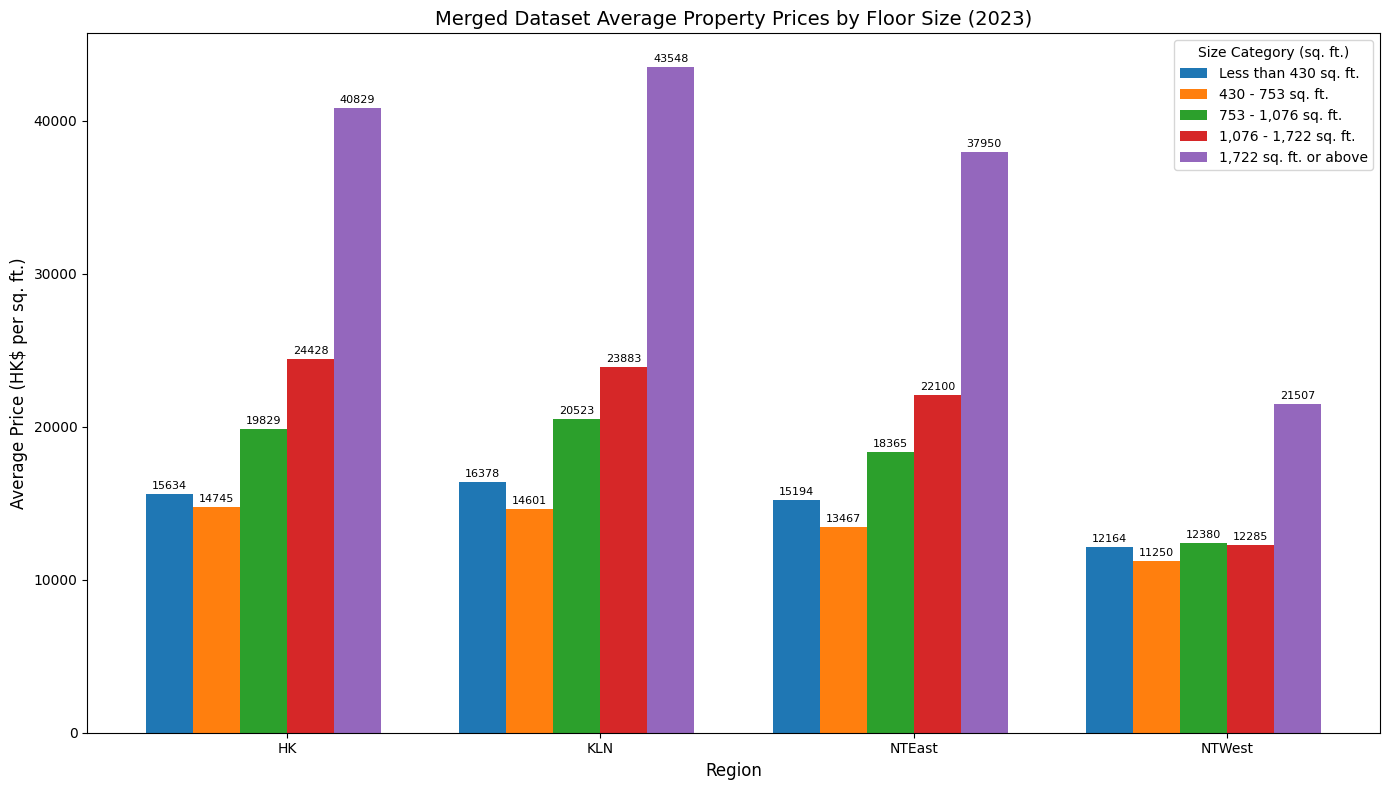

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define floor size categories
bins = [0, 430, 753, 1076, 1722, np.inf]
labels = ['Less than 430 sq. ft.', '430 - 753 sq. ft.', '753 - 1,076 sq. ft.',
          '1,076 - 1,722 sq. ft.', '1,722 sq. ft. or above']

# Create a new column for floor size categories based on the bins
merged_dataset['floor_size_category'] = pd.cut(merged_dataset['saleable_area(ft^2)'], bins=bins, labels=labels)

# Filter data for 2023
data_2023 = merged_dataset[merged_dataset['YearQuarter'].str.startswith('2023')]

# Group by region and floor size category, then calculate the mean unit rate
unit_rate_summary = data_2023.groupby(['region', 'floor_size_category'])['unit_rate'].mean().unstack()

# Replace NaN values with 0 for missing combinations
unit_rate_summary = unit_rate_summary.fillna(0)

# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# Define the width of the bars
bar_width = 0.15

# Define the positions of the bars for each floor size category
regions = unit_rate_summary.index.tolist()
categories = unit_rate_summary.columns.tolist()
x_positions = np.arange(len(regions))

# Plot the bars for each size category
for i, category in enumerate(categories):
    ax.bar(x_positions + i * bar_width, unit_rate_summary[category], bar_width, label=category)

# Adding labels and title
ax.set_xlabel('Region', fontsize=12)
ax.set_ylabel('Average Price (HK$ per sq. ft.)', fontsize=12)
ax.set_title('Merged Dataset Average Property Prices by Floor Size (2023)', fontsize=14)

# Set the x-ticks and labels
ax.set_xticks(x_positions + (bar_width * len(categories)) / 2)
ax.set_xticklabels(regions, rotation=0, ha='center')

# Adding a legend
ax.legend(title="Size Category (sq. ft.)", fontsize=10)

# Adding mean values as numbers on the bars
for i, category in enumerate(categories):
    for j, value in enumerate(unit_rate_summary[category]):
        if value > 0:  # Avoid displaying 0 values
            ax.text(j + i * bar_width, value + 200, f'{value:.0f}', ha='center', va='bottom', fontsize=8)

# Adjust layout to prevent clipping of tick labels
plt.tight_layout()

# Show the plot
plt.show()

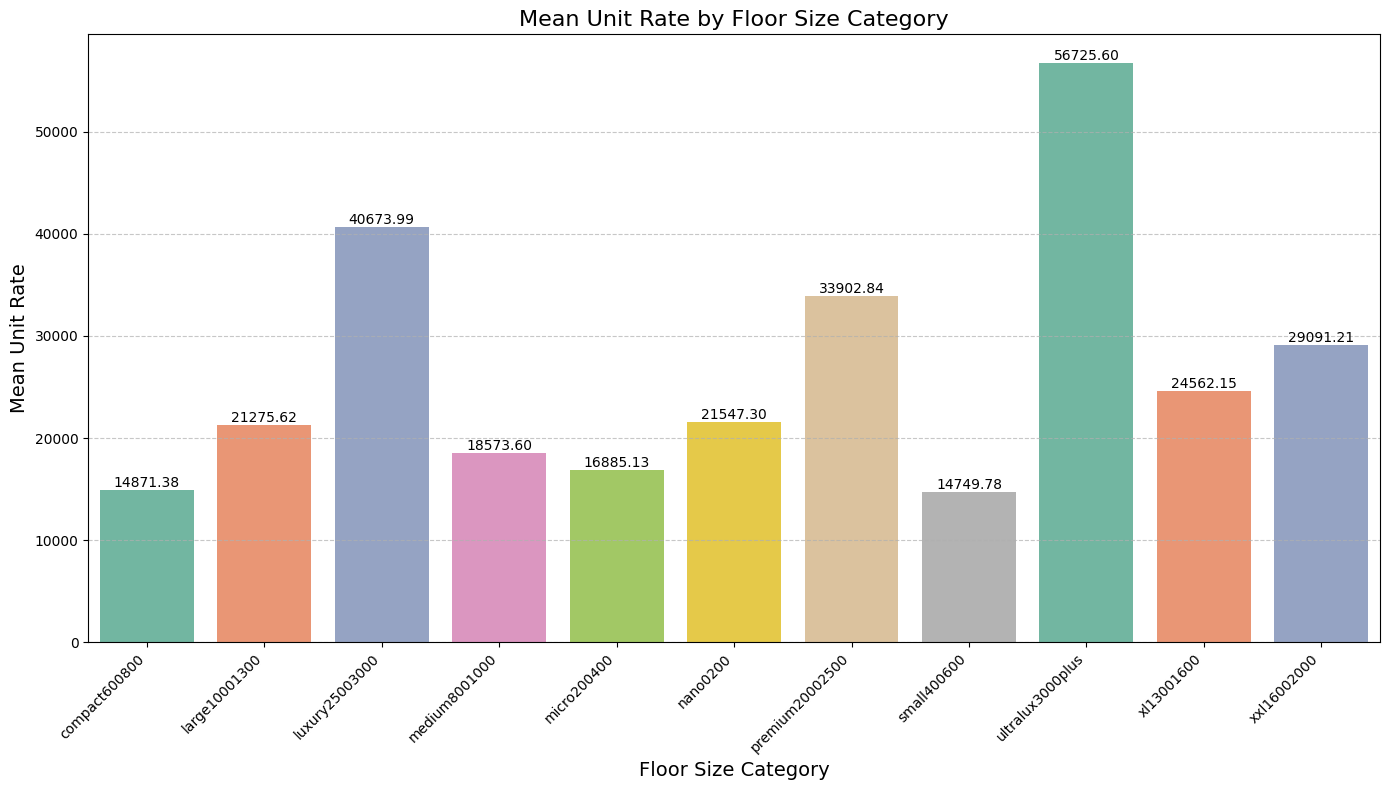

In [ ]:

# Drop rows where unit_rate or floor_size is NaN
merged_dataset = merged_dataset.dropna(subset=['unit_rate', 'floor_size'])

# Ensure unit_rate values are finite
merged_dataset = merged_dataset[merged_dataset['unit_rate'].apply(lambda x: x not in [float('inf'), float('-inf')])]

# Group by floor_size and calculate the mean unit_rate for each category
average_unit_rate = merged_dataset.groupby('floor_size')['unit_rate'].mean().reset_index()

# Create a figure
plt.figure(figsize=(14, 8))

# Create a bar plot
sns.barplot(x='floor_size', y='unit_rate', data=average_unit_rate, palette='Set2')

# Add mean values as text on top of each bar
for index, row in average_unit_rate.iterrows():
    if not pd.isna(row['unit_rate']):  # Ensure the value is not NaN
        plt.text(
            x=index,
            y=row['unit_rate'],
            s=f"{row['unit_rate']:.2f}",  # Format the mean value to 2 decimal places
            ha='center',
            va='bottom',
            fontsize=10,
            color='black'
        )

# Customize the plot
plt.title('Mean Unit Rate by Floor Size Category', fontsize=16)
plt.xlabel('Floor Size Category', fontsize=14)
plt.ylabel('Mean Unit Rate', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

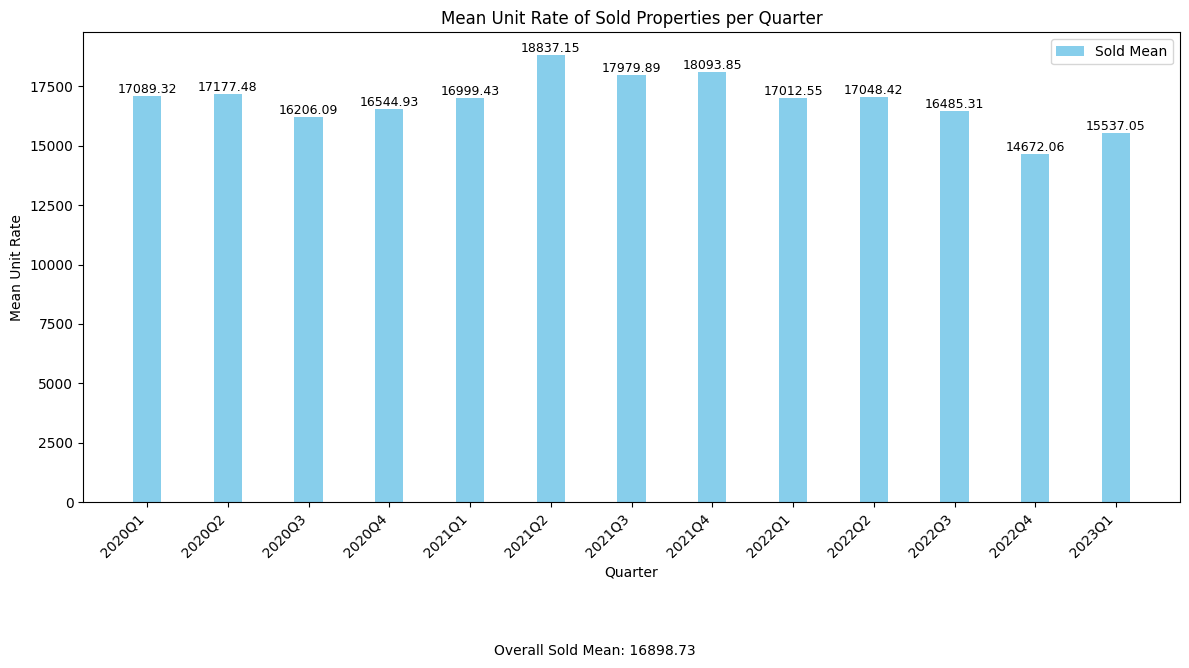

In [ ]:
# Group by YearQuarter and calculate mean of unit rates
sold_mean = merged_dataset.groupby('YearQuarter')['unit_rate'].mean()

# Create a DataFrame for the mean unit rates
unit_rates_summary = pd.DataFrame({
    'Sold Mean': sold_mean
}).fillna(0)

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Define the width of the bars
bar_width = 0.35

# Define the positions of the bars
index = np.arange(len(unit_rates_summary))

# Plot the bars
bar1 = ax.bar(index, unit_rates_summary['Sold Mean'], bar_width, label='Sold Mean', color='skyblue')

# Adding labels and title
ax.set_xlabel('Quarter')
ax.set_ylabel('Mean Unit Rate')
ax.set_title('Mean Unit Rate of Sold Properties per Quarter')

# Set the x-ticks and labels
ax.set_xticks(index)
ax.set_xticklabels(unit_rates_summary.index.astype(str), rotation=45, ha='right')

# Adding a legend
ax.legend()

# Display mean values as numbers on the bars
for i in range(len(index)):
    ax.text(index[i], unit_rates_summary['Sold Mean'][i] + 0.01,
            f'{unit_rates_summary["Sold Mean"][i]:.2f}',
            ha='center', va='bottom', fontsize=9)

# Calculate the overall mean
sold_overall_mean = sold_mean.mean()

# Display overall average below the graph
plt.figtext(0.5, -0.1, f"Overall Sold Mean: {sold_overall_mean:.2f}", ha='center', fontsize=10)

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Show the plot
plt.show()

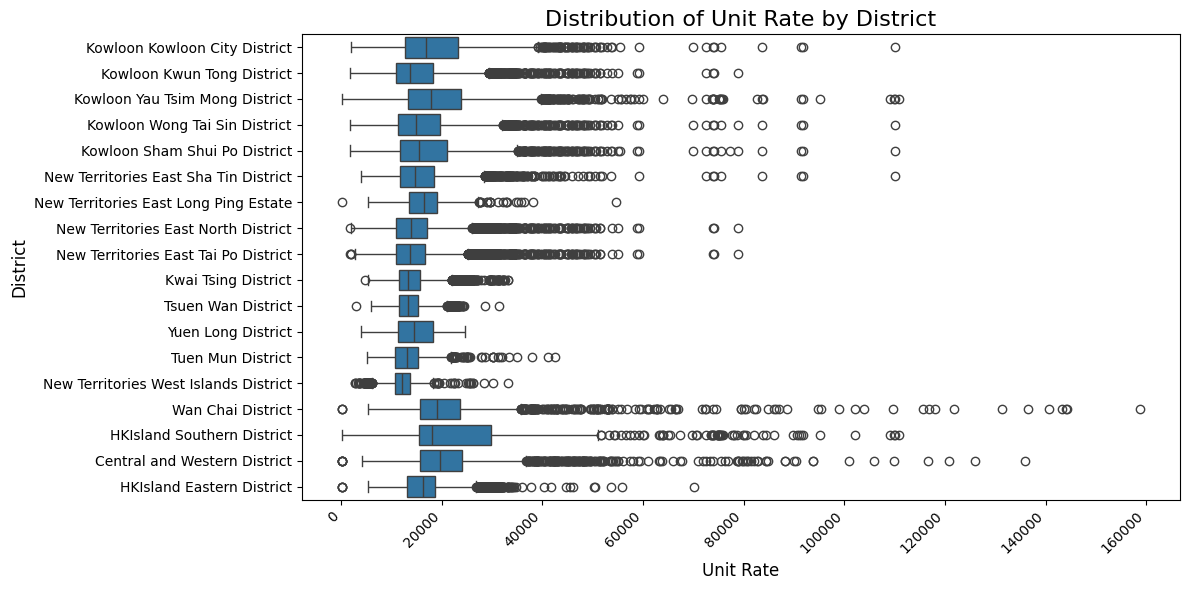

In [ ]:
# Plotting box plot for merged_dataset (replace private_sold with merged_dataset)
plt.figure(figsize=(12, 6))
sns.boxplot(x='unit_rate', y='district', data=merged_dataset)

# Customize the plot
plt.title('Distribution of Unit Rate by District', fontsize=16)
plt.xlabel('Unit Rate', fontsize=12)
plt.ylabel('District', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

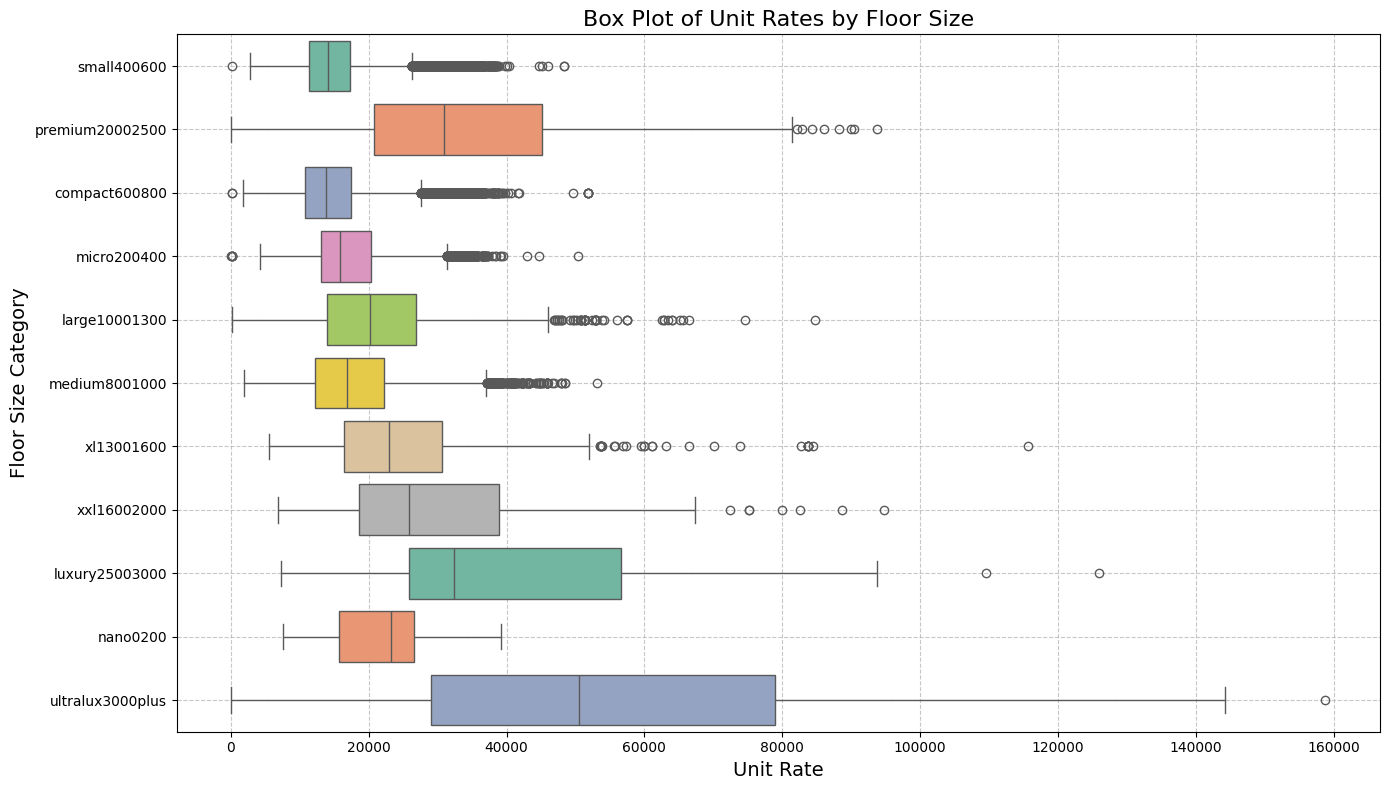

In [ ]:
# Plotting the box plot with updated syntax for future compatibility
plt.figure(figsize=(14, 8))  # Increase figure size for better readability

# Replace 'private_sold' with 'merged_dataset'
sns.boxplot(x='unit_rate', y='floor_size', data=merged_dataset, palette='Set2', hue=None, dodge=False)

# Customizing the plot
plt.title('Box Plot of Unit Rates by Floor Size', fontsize=16)
plt.xlabel('Unit Rate', fontsize=14)
plt.ylabel('Floor Size Category', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# SALEABLE AREA

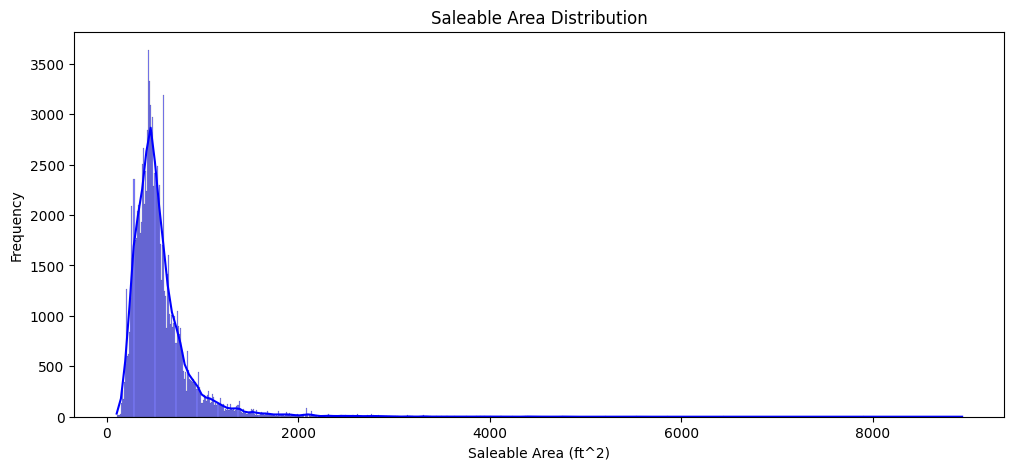

In [ ]:
plt.figure(figsize=(12, 5))
sns.histplot(merged_dataset['saleable_area(ft^2)'], kde=True, color='blue')
plt.title('Saleable Area Distribution')
plt.xlabel('Saleable Area (ft^2)')
plt.ylabel('Frequency')
plt.show()

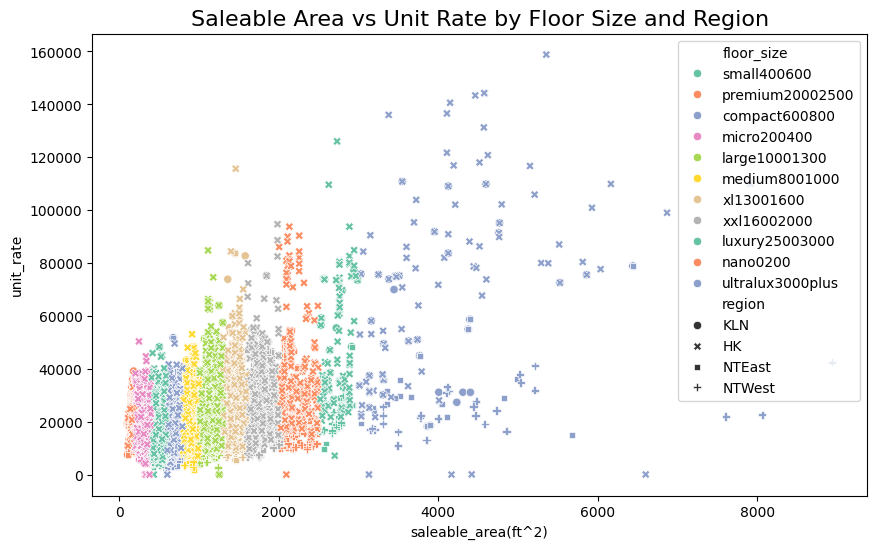

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='saleable_area(ft^2)', y='unit_rate', hue='floor_size', data=merged_dataset, palette='Set2', style='region')
plt.title('Saleable Area vs Unit Rate by Floor Size and Region', size=16)
plt.show()

# REGIONS

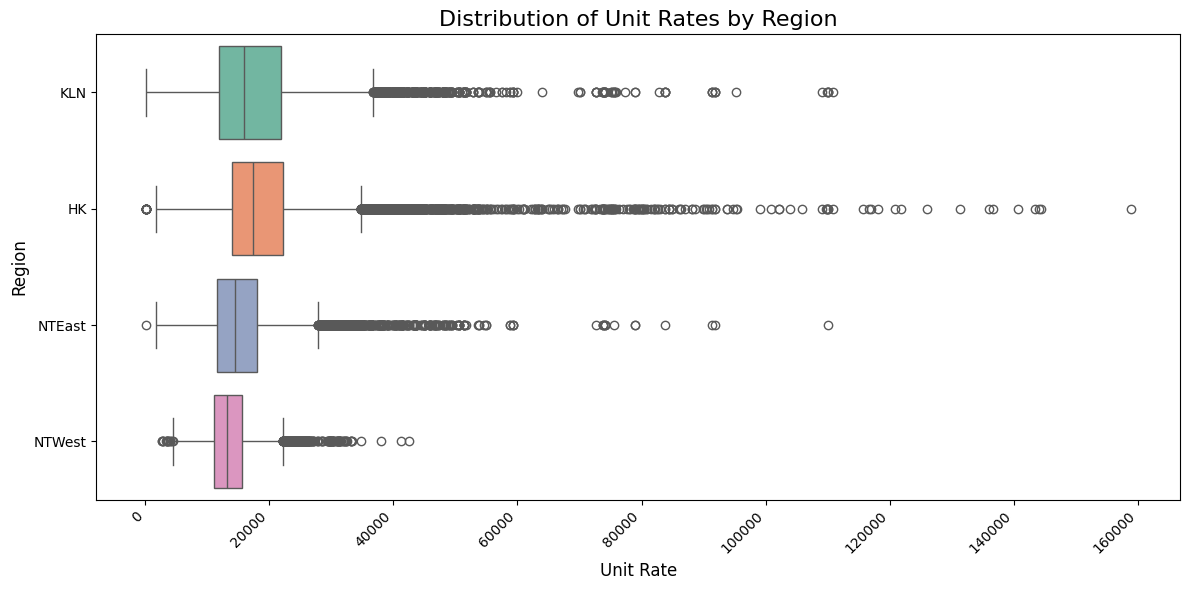

In [ ]:
# Plotting box plot for private sold properties by region
plt.figure(figsize=(12, 6))
sns.boxplot(x='unit_rate', y='region', data=merged_dataset, palette='Set2')

# Customize the plot
plt.title('Distribution of Unit Rates by Region', fontsize=16)
plt.xlabel('Unit Rate', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

<Figure size 1400x800 with 0 Axes>

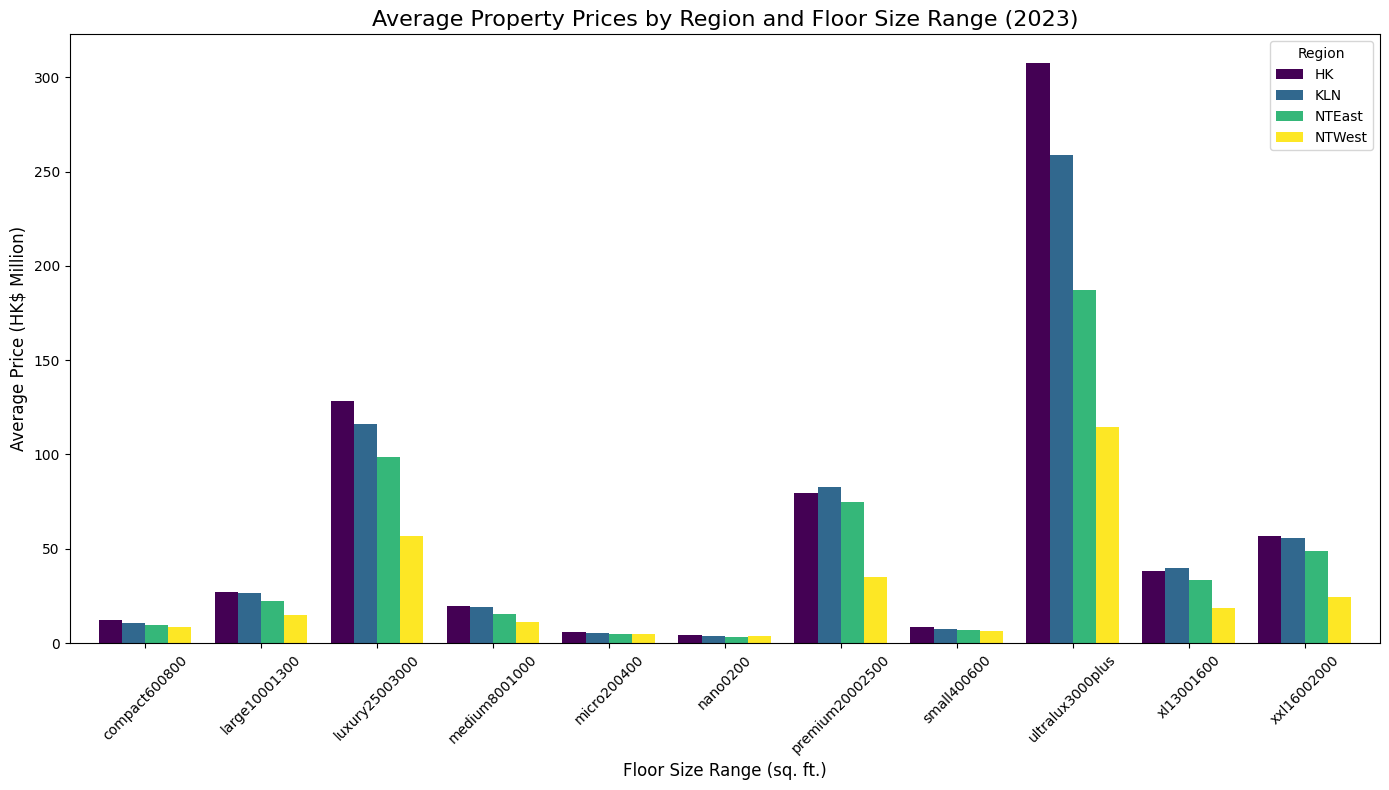

In [ ]:
#Compare data set data
# Group by region and floor size range, calculate the average price
grouped_data = (
    merged_dataset
    .groupby(['region', 'floor_size'])['new_price']
    .mean()
    .reset_index()
)

# Scale the prices to HK$ millions
grouped_data['new_price'] = grouped_data['new_price'] / 1_000_000

# Pivot the data for better visualization (regions as columns)
pivot_data = grouped_data.pivot(index='floor_size', columns='region', values='new_price')

# Plotting the grouped data
plt.figure(figsize=(14, 8))  # Adjust figure size
pivot_data.plot(kind='bar', figsize=(14, 8), colormap='viridis', width=0.8)

# Add labels, title, and legend
plt.title("Average Property Prices by Region and Floor Size Range (2023)", fontsize=16)
plt.xlabel("Floor Size Range (sq. ft.)", fontsize=12)
plt.ylabel("Average Price (HK$ Million)", fontsize=12)  # Update the y-axis label
plt.legend(title="Region", fontsize=10)
plt.xticks(rotation=45, fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

The government data indicates most property transactions occur in Kowloon and the New Territories, but this is not reflected in the dataset, likely due to underreporting. This imbalance skews machine learning (ML) models toward Hong Kong Island's high-value properties, reducing their accuracy for mid-to-low price segments in underrepresented areas. The model may overemphasize luxury trends, misrepresent regional importance, and fail to generalize across the entire market. Feature associations like price per sq. ft. will also be distorted, making predictions unreliable for Kowloon and New Territories. To address this, data balancing, error correction (to account for underreporting), and regional segmentation are essential to ensure the model accurately reflects all regions and property types in its predictions.

<Figure size 1400x800 with 0 Axes>

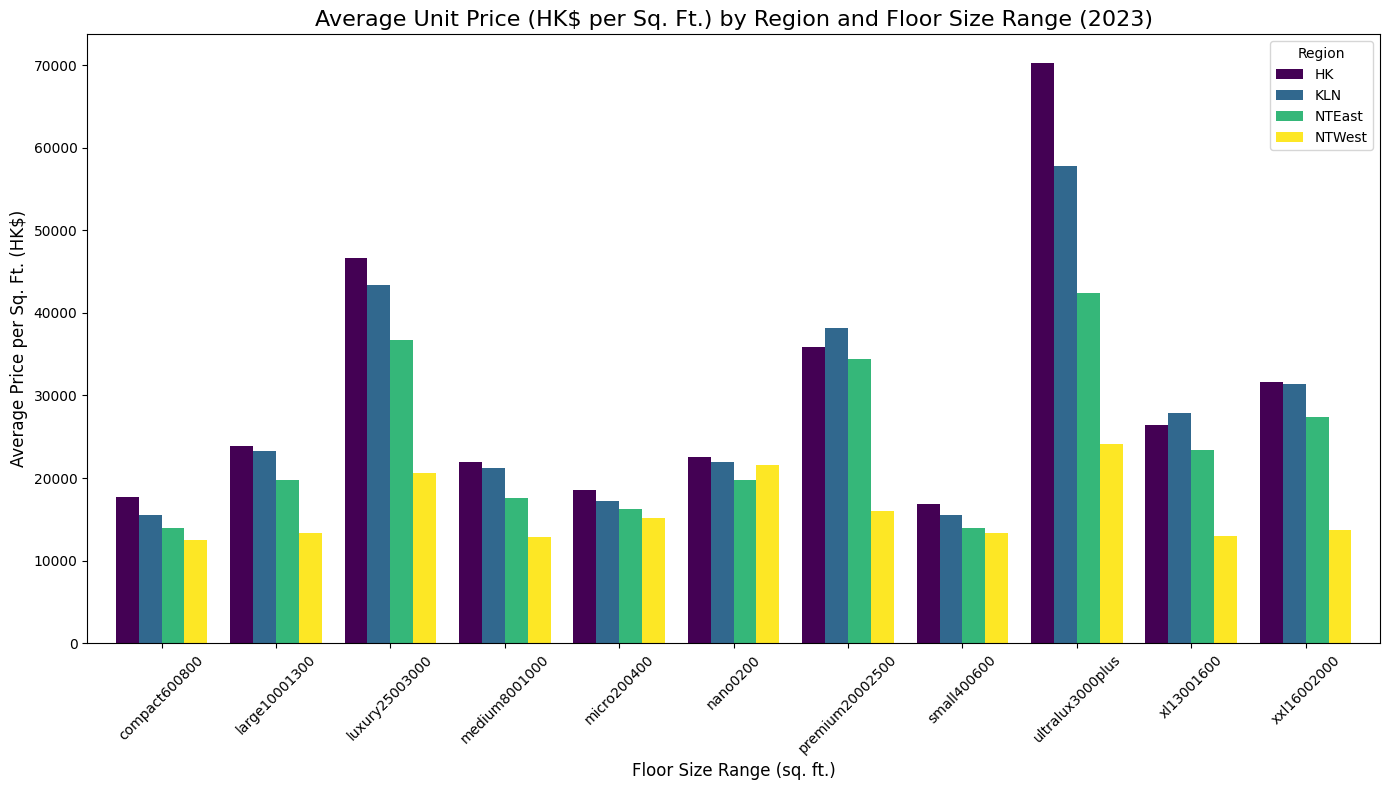

In [ ]:

# Step 1: Group by region and floor size range, calculate the average unit rate
grouped_unit_rate = (
    merged_dataset
    .groupby(['region', 'floor_size'])['unit_rate']
    .mean()
    .reset_index()
)

# Step 2: Pivot the data for better visualization (regions as columns)
pivot_unit_rate = grouped_unit_rate.pivot(index='floor_size', columns='region', values='unit_rate')

# Step 3: Plot the average unit rates
plt.figure(figsize=(14, 8))
pivot_unit_rate.plot(kind='bar', figsize=(14, 8), colormap='viridis', width=0.8)

# Add labels, title, and legend
plt.title("Average Unit Price (HK$ per Sq. Ft.) by Region and Floor Size Range (2023)", fontsize=16)
plt.xlabel("Floor Size Range (sq. ft.)", fontsize=12)
plt.ylabel("Average Price per Sq. Ft. (HK$)", fontsize=12)
plt.legend(title="Region", fontsize=10)
plt.xticks(rotation=45, fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

The chart demonstrates Hong Kong Island's dominance in high average unit prices, especially for luxury properties, overshadowing mid- and low-priced transactions in Kowloon and the New Territories. This imbalance, combined with extreme outliers exceeding HK$70,000 per sq. ft., will severely skews machine learning (ML) models. The result will be overfitting to rare, high-value properties, biased predictions, and poor generalization to typical transactions. Additionally, underrepresentation of Kowloon and New Territories will lead to inaccuracies for these regions and misaligned trends. To address these issues, outliers must be capped or removed to stabilize the dataset, regional segmentation should be applied to account for unique market differences, and data balancing is essential to reflect actual transaction volumes.

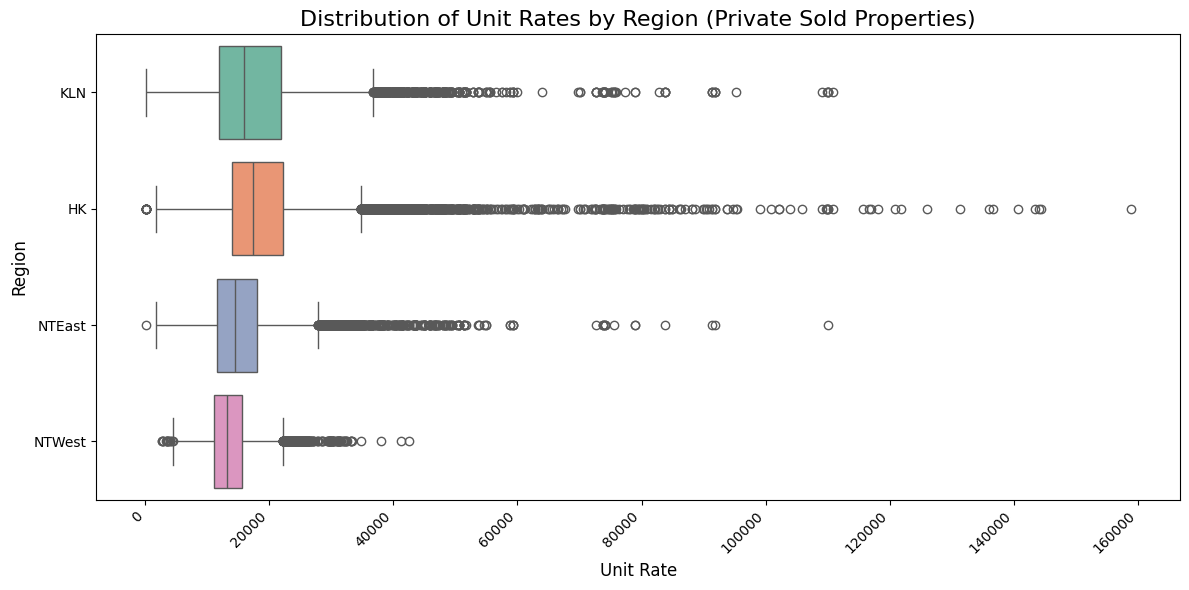

In [ ]:
# Plotting box plot for private sold properties by region
plt.figure(figsize=(12, 6))
sns.boxplot(x='unit_rate', y='region', data=merged_dataset, palette='Set2')

# Customize the plot
plt.title('Distribution of Unit Rates by Region (Private Sold Properties)', fontsize=16)
plt.xlabel('Unit Rate', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

# DISTRICTS

Number of districts: 18


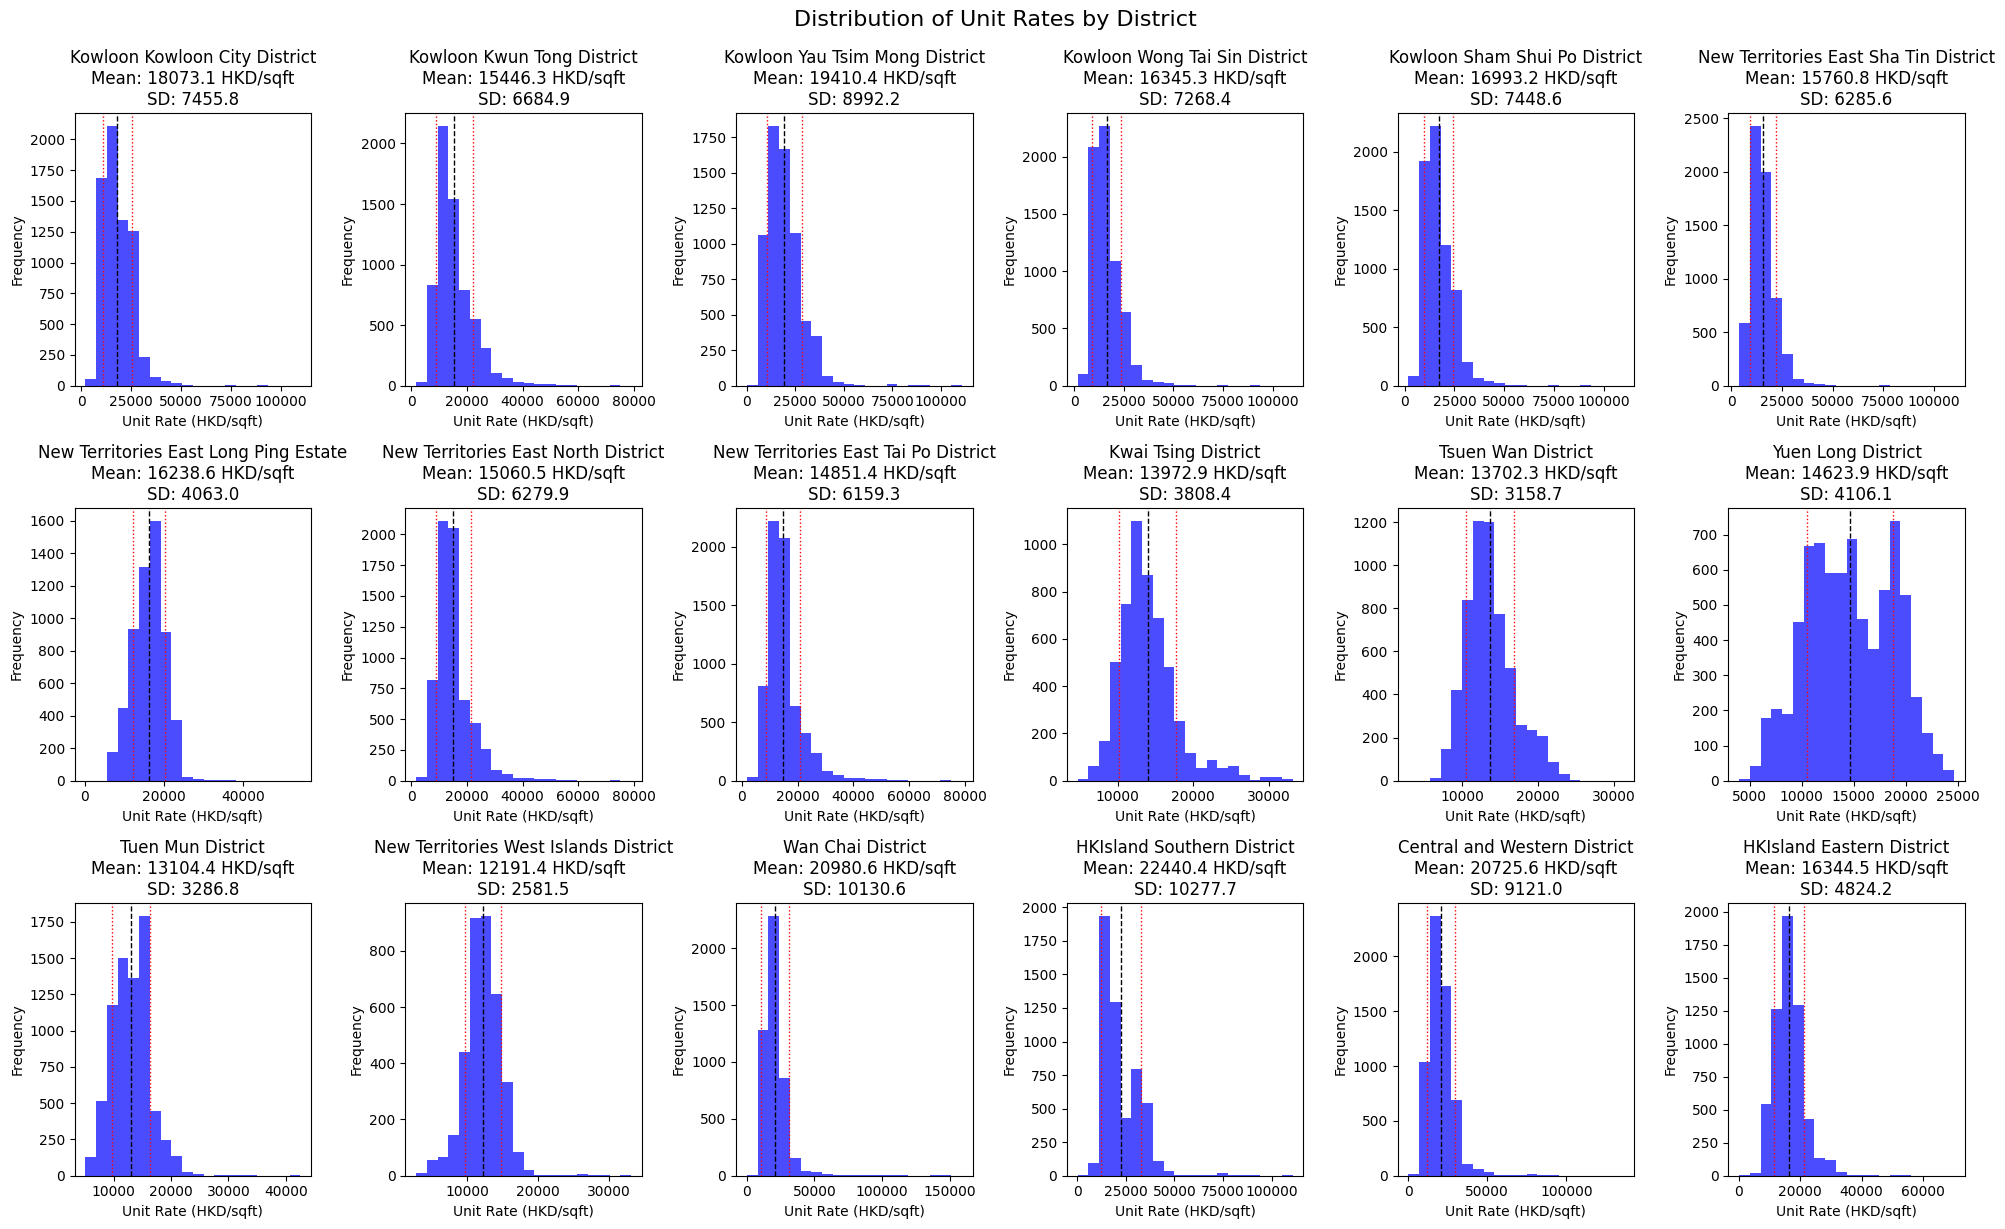

In [ ]:
# Step 1: Check unique districts
districts = merged_dataset['district'].unique()
num_districts = len(districts)
print(f"Number of districts: {num_districts}")  # Should print ~18 districts

# Step 2: Set up the grid for subplots
rows = 3  # Number of rows in the grid
cols = 6  # Number of columns in the grid (adjust based on the number of districts)
fig, axes = plt.subplots(rows, cols, figsize=(20, 12))  # Adjust figure size for readability
axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

# Step 3: Generate subplots for each district
for i, district in enumerate(districts):
    district_data = merged_dataset[merged_dataset['district'] == district]
    unit_rates = district_data['unit_rate']
    mean = np.mean(unit_rates)
    std_dev = np.std(unit_rates)

    # Plot histogram for the current district
    axes[i].hist(
        unit_rates, bins=20, alpha=0.7, color='blue'
    )
    axes[i].axvline(mean, color='black', linestyle='dashed', linewidth=1)  # Mean
    axes[i].axvline(mean - std_dev, color='red', linestyle='dotted', linewidth=1)  # -1 Std Dev
    axes[i].axvline(mean + std_dev, color='red', linestyle='dotted', linewidth=1)  # +1 Std Dev

    # Title and labels
    axes[i].set_title(f'{district}\nMean: {mean:.1f} HKD/sqft\nSD: {std_dev:.1f}')
    axes[i].set_xlabel('Unit Rate (HKD/sqft)')
    axes[i].set_ylabel('Frequency')

# Step 4: Remove unused subplots if districts < total grid slots
for j in range(len(districts), len(axes)):
    fig.delaxes(axes[j])  # Remove empty subplots

# Step 5: Adjust layout and save as one image
plt.tight_layout()
plt.suptitle('Distribution of Unit Rates by District', y=1.02, fontsize=16)  # Add a global title
plt.savefig('district_unit_rate_distributions.png')  # Save as an image file
plt.show()

Mean: 16422.378958771427, Standard Deviation: 7127.563931937343
Lower Threshold: -4960.312837040601, Upper Threshold: 37805.07075458346
Number of outliers: 1305
Percentage of outliers: 1.19%


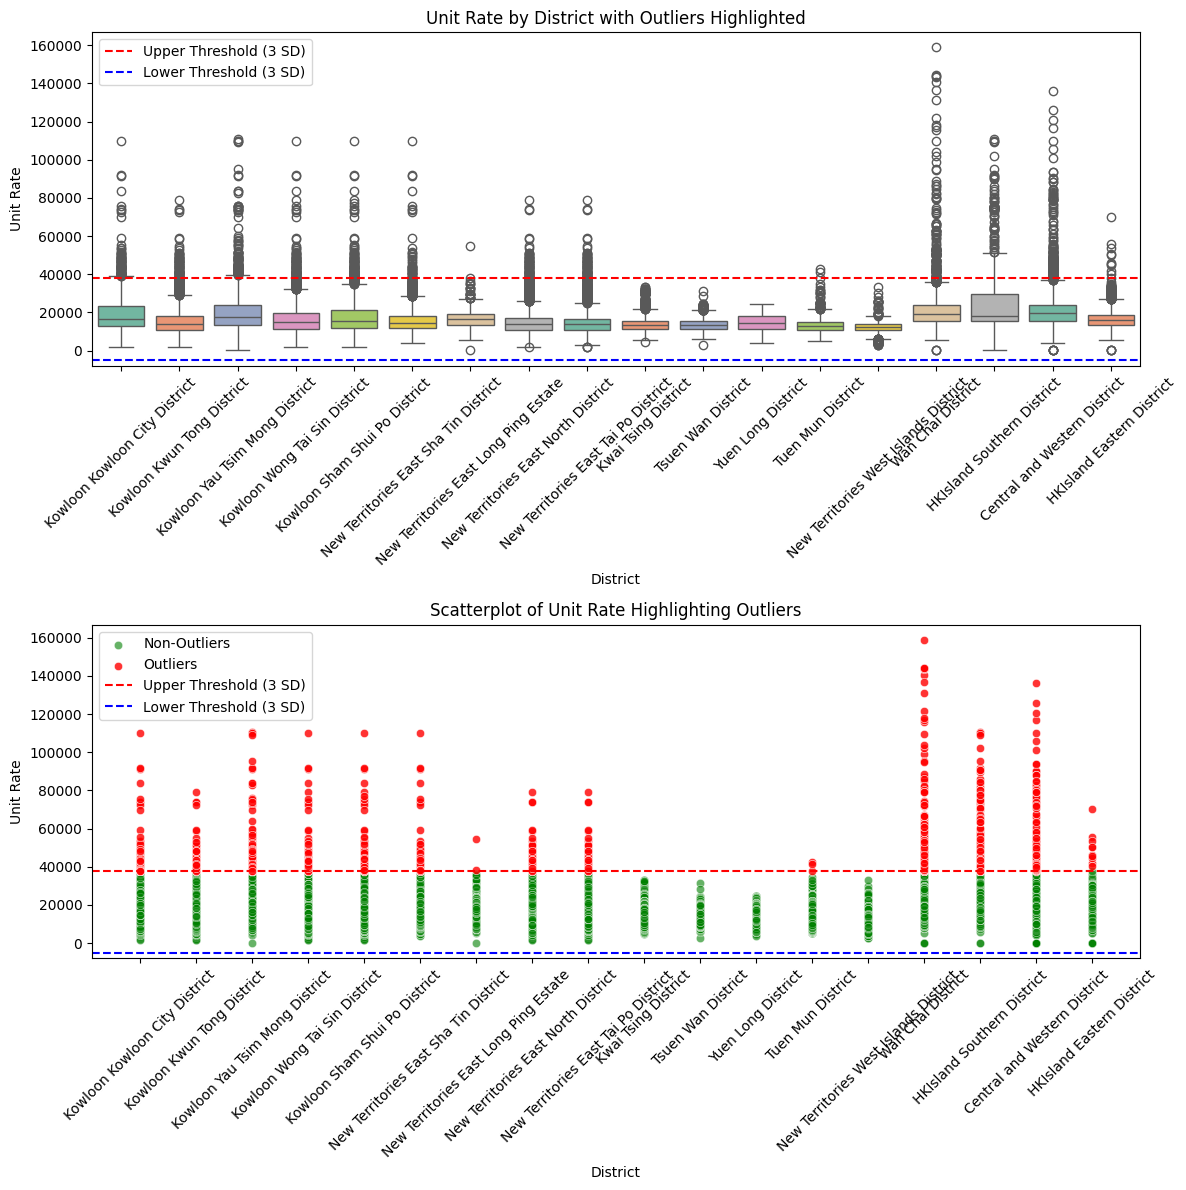

In [ ]:

# Step 1: Calculate mean and standard deviation
mean = merged_dataset['unit_rate'].mean()
std = merged_dataset['unit_rate'].std()

# Step 2: Define outlier thresholds (3 SD from the mean)
lower_threshold = mean - 3 * std
upper_threshold = mean + 3 * std

print(f"Mean: {mean}, Standard Deviation: {std}")
print(f"Lower Threshold: {lower_threshold}, Upper Threshold: {upper_threshold}")

# Step 3: Identify outliers
merged_dataset['is_outlier'] = (merged_dataset['unit_rate'] < lower_threshold) | (merged_dataset['unit_rate'] > upper_threshold)

# Step 4: Separate outliers and non-outliers
outliers = merged_dataset[merged_dataset['is_outlier']]
non_outliers = merged_dataset[~merged_dataset['is_outlier']]

# Print summary
print(f"Number of outliers: {len(outliers)}")
print(f"Percentage of outliers: {len(outliers) / len(merged_dataset) * 100:.2f}%")

# Step 5: Create vertically stacked plots
fig, axes = plt.subplots(2, 1, figsize=(12, 12))  # Two rows, one column

# Boxplot: Indicating outliers
sns.boxplot(ax=axes[0], data=merged_dataset, x='district', y='unit_rate', palette='Set2', showfliers=True)
axes[0].axhline(upper_threshold, color='red', linestyle='--', label='Upper Threshold (3 SD)')
axes[0].axhline(lower_threshold, color='blue', linestyle='--', label='Lower Threshold (3 SD)')
axes[0].set_title('Unit Rate by District with Outliers Highlighted')
axes[0].tick_params(axis='x', rotation=45)  # Rotate labels for readability
axes[0].set_xlabel('District')  # Adding x-axis label
axes[0].set_ylabel('Unit Rate')  # Adding y-axis label
axes[0].legend()

# Scatterplot: Highlighting outliers
sns.scatterplot(ax=axes[1], data=non_outliers, x='district', y='unit_rate', color='green', label='Non-Outliers', alpha=0.6)
sns.scatterplot(ax=axes[1], data=outliers, x='district', y='unit_rate', color='red', label='Outliers', alpha=0.8)
axes[1].axhline(upper_threshold, color='red', linestyle='--', label='Upper Threshold (3 SD)')
axes[1].axhline(lower_threshold, color='blue', linestyle='--', label='Lower Threshold (3 SD)')
axes[1].set_title('Scatterplot of Unit Rate Highlighting Outliers')
axes[1].tick_params(axis='x', rotation=45)  # Rotate labels for readability
axes[1].set_xlabel('District')  # Adding x-axis label
axes[1].set_ylabel('Unit Rate')  # Adding y-axis label
axes[1].legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

The dataset contains extreme outliers, with unit rates exceeding HK$140,000 per sq. ft., far above the typical market average of HK$25,000 per sq. ft. These outliers, likely due to errors or rare super-luxury properties, negatively impact machine learning (ML) models. They skew the loss function, forcing the model to focus on unrealistic values, resulting in overfitting and poor generalization to new data. Predictions become inaccurate, overestimating prices for typical properties and underestimating prices in luxury markets.

Dropping outliers using the 3 standard deviation (SD) rule is essential to mitigate these effects. This step removes noise, reduces bias, and allows the model to focus on realistic patterns. By eliminating extreme values, ML algorithms can better learn meaningful relationships, improve accuracy, and produce predictions that align with real market behavior. This preprocessing step is critical for robust, reliable, and interpretable models.

Average new_price per district:
district
Tuen Mun District                        6.457966e+06
Kwai Tsing District                      6.591054e+06
Tsuen Wan District                       7.506528e+06
Yuen Long District                       7.598074e+06
New Territories East North District      8.641543e+06
New Territories East Tai Po District     8.708716e+06
New Territories East Long Ping Estate    8.767521e+06
New Territories West Islands District    8.772650e+06
HKIsland Eastern District                9.083200e+06
Kowloon Kwun Tong District               9.239300e+06
New Territories East Sha Tin District    9.450249e+06
Kowloon Wong Tai Sin District            1.014694e+07
Kowloon Sham Shui Po District            1.049758e+07
Kowloon Kowloon City District            1.078890e+07
Kowloon Yau Tsim Mong District           1.227715e+07
Central and Western District             1.462935e+07
Wan Chai District                        1.663516e+07
HKIsland Southern District               

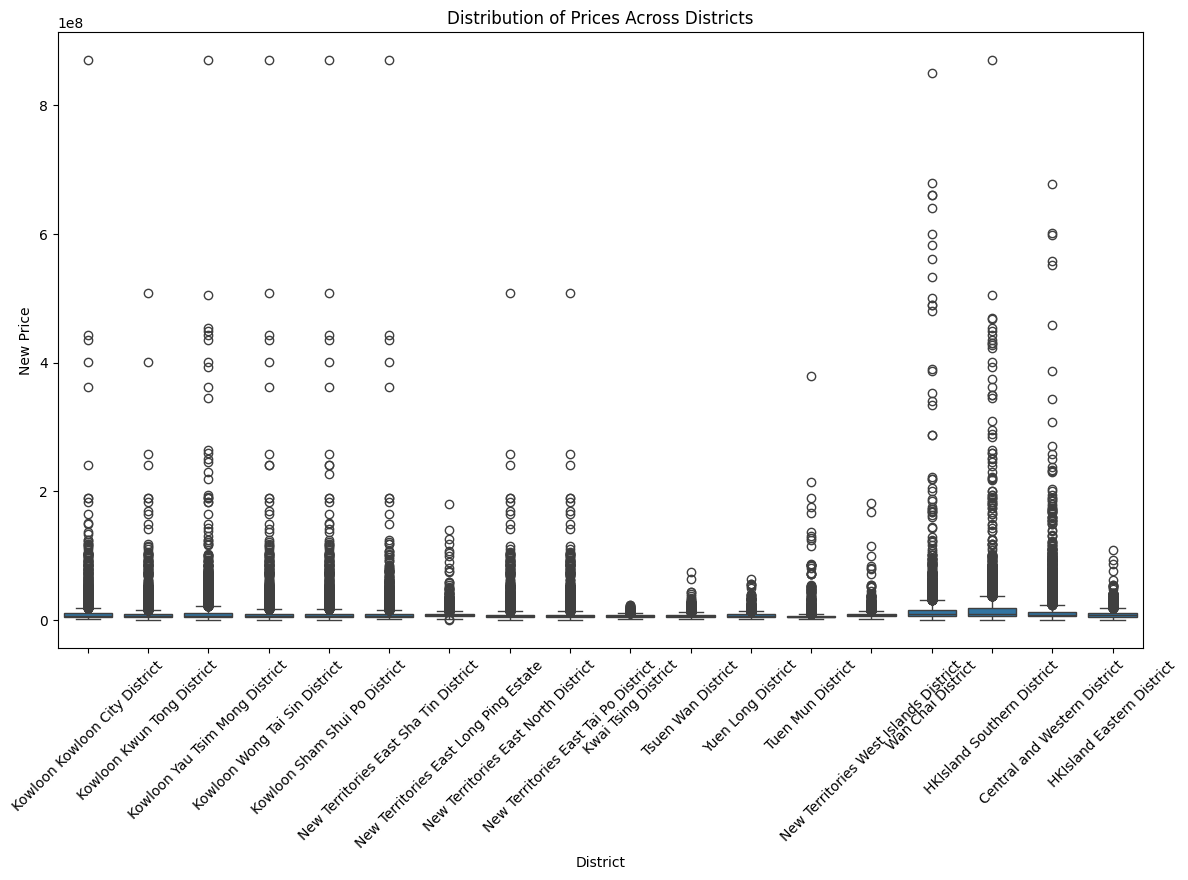

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Group-Based Analysis (Average new_price per district)
district_price_summary = merged_dataset.groupby('district')['new_price'].mean().sort_values()
print("Average new_price per district:")
print(district_price_summary)

# Step 2: Box Plot to Show Distribution of Prices by District
plt.figure(figsize=(14, 8))
sns.boxplot(x='district', y='new_price', data=merged_dataset)
plt.title('Distribution of Prices Across Districts')
plt.xlabel('District')
plt.ylabel('New Price')
plt.xticks(rotation=45)
plt.show()


# FLOOR HEIGHT


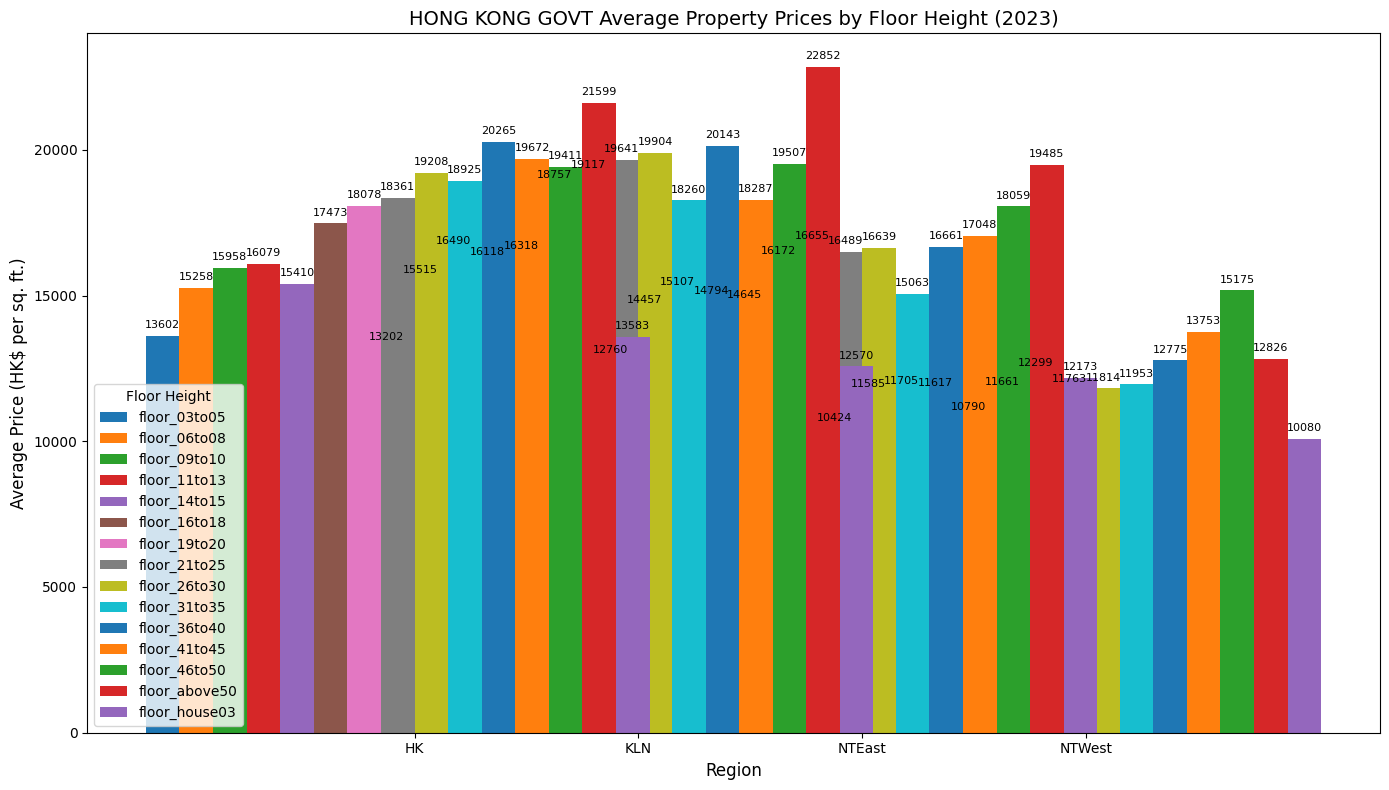

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Filter data for 2023
data_2023 = merged_dataset[merged_dataset['YearQuarter'].str.startswith('2023')]

# Group by region and floor height, then calculate the mean unit rate
unit_rate_summary = data_2023.groupby(['region', 'floor_height'])['unit_rate'].mean().unstack()

# Replace NaN values with 0 for missing combinations
unit_rate_summary = unit_rate_summary.fillna(0)

# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# Define the width of the bars
bar_width = 0.15

# Define the positions of the bars for each floor height category
regions = unit_rate_summary.index.tolist()
floor_heights = unit_rate_summary.columns.tolist()
x_positions = np.arange(len(regions))

# Plot the bars for each floor height category
for i, floor_height in enumerate(floor_heights):
    ax.bar(x_positions + i * bar_width, unit_rate_summary[floor_height], bar_width, label=floor_height)

# Adding labels and title
ax.set_xlabel('Region', fontsize=12)
ax.set_ylabel('Average Price (HK$ per sq. ft.)', fontsize=12)
ax.set_title('HONG KONG GOVT Average Property Prices by Floor Height (2023)', fontsize=14)

# Set the x-ticks and labels
ax.set_xticks(x_positions + (bar_width * len(floor_heights)) / 2)
ax.set_xticklabels(regions, rotation=0, ha='center')

# Adding a legend
ax.legend(title="Floor Height", fontsize=10)

# Adding mean values as numbers on the bars
for i, floor_height in enumerate(floor_heights):
    for j, value in enumerate(unit_rate_summary[floor_height]):
        if value > 0:  # Avoid displaying 0 values
            ax.text(j + i * bar_width, value + 200, f'{value:.0f}', ha='center', va='bottom', fontsize=8)

# Adjust layout to prevent clipping of tick labels
plt.tight_layout()

# Show the plot
plt.show()

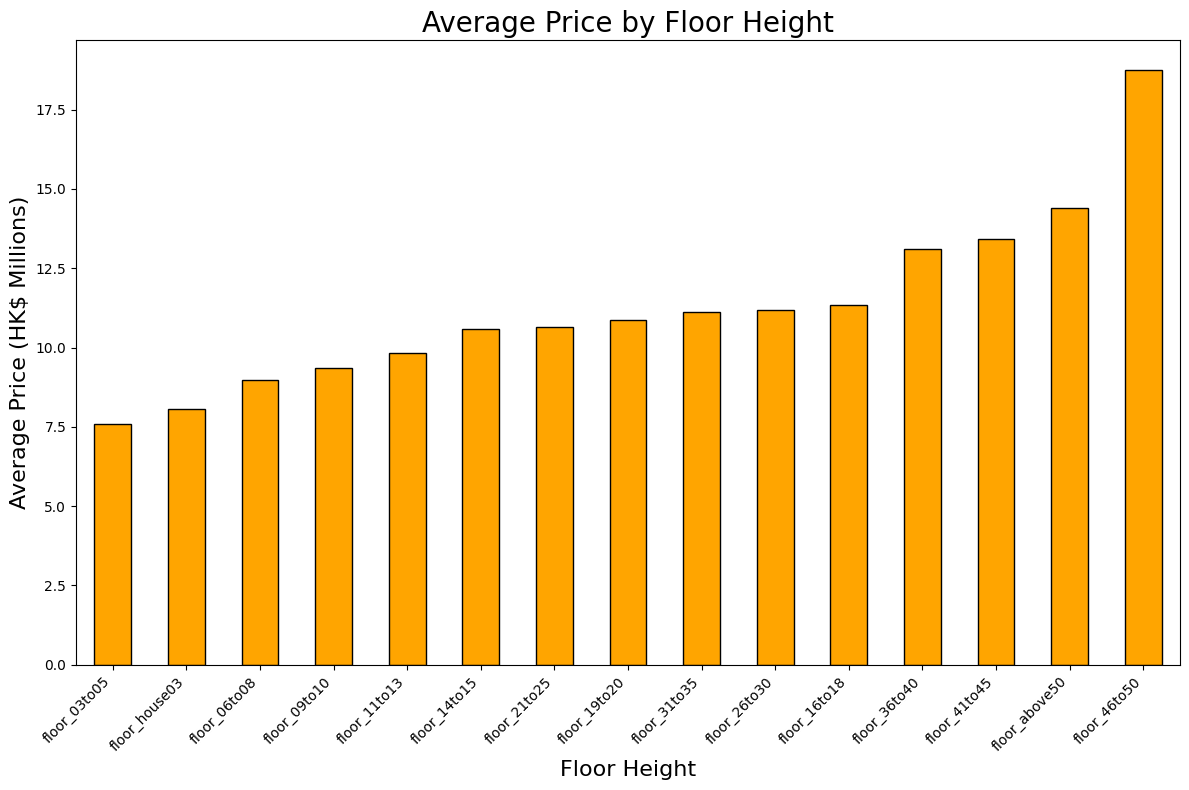

In [ ]:
plt.figure(figsize=(12, 8))

# Calculate average prices and convert to HK$ millions
avg_prices = merged_dataset.groupby('floor_height')['new_price'].mean().sort_values() / 1_000_000

# Plot the values
avg_prices.plot(kind='bar', color='orange', edgecolor='black')

# Customizing the plot
plt.title('Average Price by Floor Height', fontsize=20)
plt.xlabel('Floor Height', fontsize=16)
plt.ylabel('Average Price (HK$ Millions)', fontsize=16)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()



In [ ]:
merged_dataset.groupby(['YearQuarter', 'floor_height']).size().unstack()
#.size().unstack(fill_value=0)+

floor_height  floor_03to05  floor_06to08  floor_09to10  floor_11to13  \
YearQuarter                                                            
2020Q1                  22            22            15            22   
2020Q2                 179           159           111           119   
2020Q3                 184           166           106           145   
2020Q4                 180           160           134           163   
2021Q1                 275           297           185           258   
2021Q2                 524           597           423           547   
2021Q3                 840           938           595           812   
2021Q4                1153          1215           727           852   
2022Q1                 747           790           483           639   
2022Q2                1441          1657          1120          1331   
2022Q3                2090          2240          1267          1555   
2022Q4                3035          2945          1591          2040   
2023Q1                2677          3786          1910          3080   

floor_height  floor_14to15  floor_16to18  floor_19to20  floor_21to25  \
YearQuarter                                                            
2020Q1                   8            20            15            29   
2020Q2                  79           113            72           127   
2020Q3                  85           176            83           155   
2020Q4                  96           159            85           183   
2021Q1                 145           279           178           276   
2021Q2                 299           600           307           642   
2021Q3                 488           813           446           879   
2021Q4                 386           724           473           913   
2022Q1                 315           624           370           671   
2022Q2                 726          1473           770          1217   
2022Q3                 755          1383           917          1611   
2022Q4                 962          1468           908          1686   
2023Q1                1199          2066          1256          2764   

floor_height  floor_26to30  floor_31to35  floor_36to40  floor_41to45  \
YearQuarter                                                            
2020Q1                   8             9             2             1   
2020Q2                  93            68            45            18   
2020Q3                 136            96            72            32   
2020Q4                 123            72            66            35   
2021Q1                 235           150           110            43   
2021Q2                 536           337           252           107   
2021Q3                 673           384           228            99   
2021Q4                 694           414           215           124   
2022Q1                 559           337           216           122   
2022Q2                 915           575           456           181   
2022Q3                1253           713           483           230   
2022Q4                1170           799           595           294   
2023Q1                1687          1018           692           407   

floor_height  floor_46to50  floor_above50  floor_house03  
YearQuarter                                               
2020Q1                   4              4             11  
2020Q2                  11              3             79  
2020Q3                  29             28            116  
2020Q4                  35             43             99  
2021Q1                  48             60            150  
2021Q2                  90            118            266  
2021Q3                 117            123            393  
2021Q4                 139            133            772  
2022Q1                 122            108            431  
2022Q2                 200            219            809  
2022Q3                 187            263        

<Figure size 1200x1000 with 0 Axes>

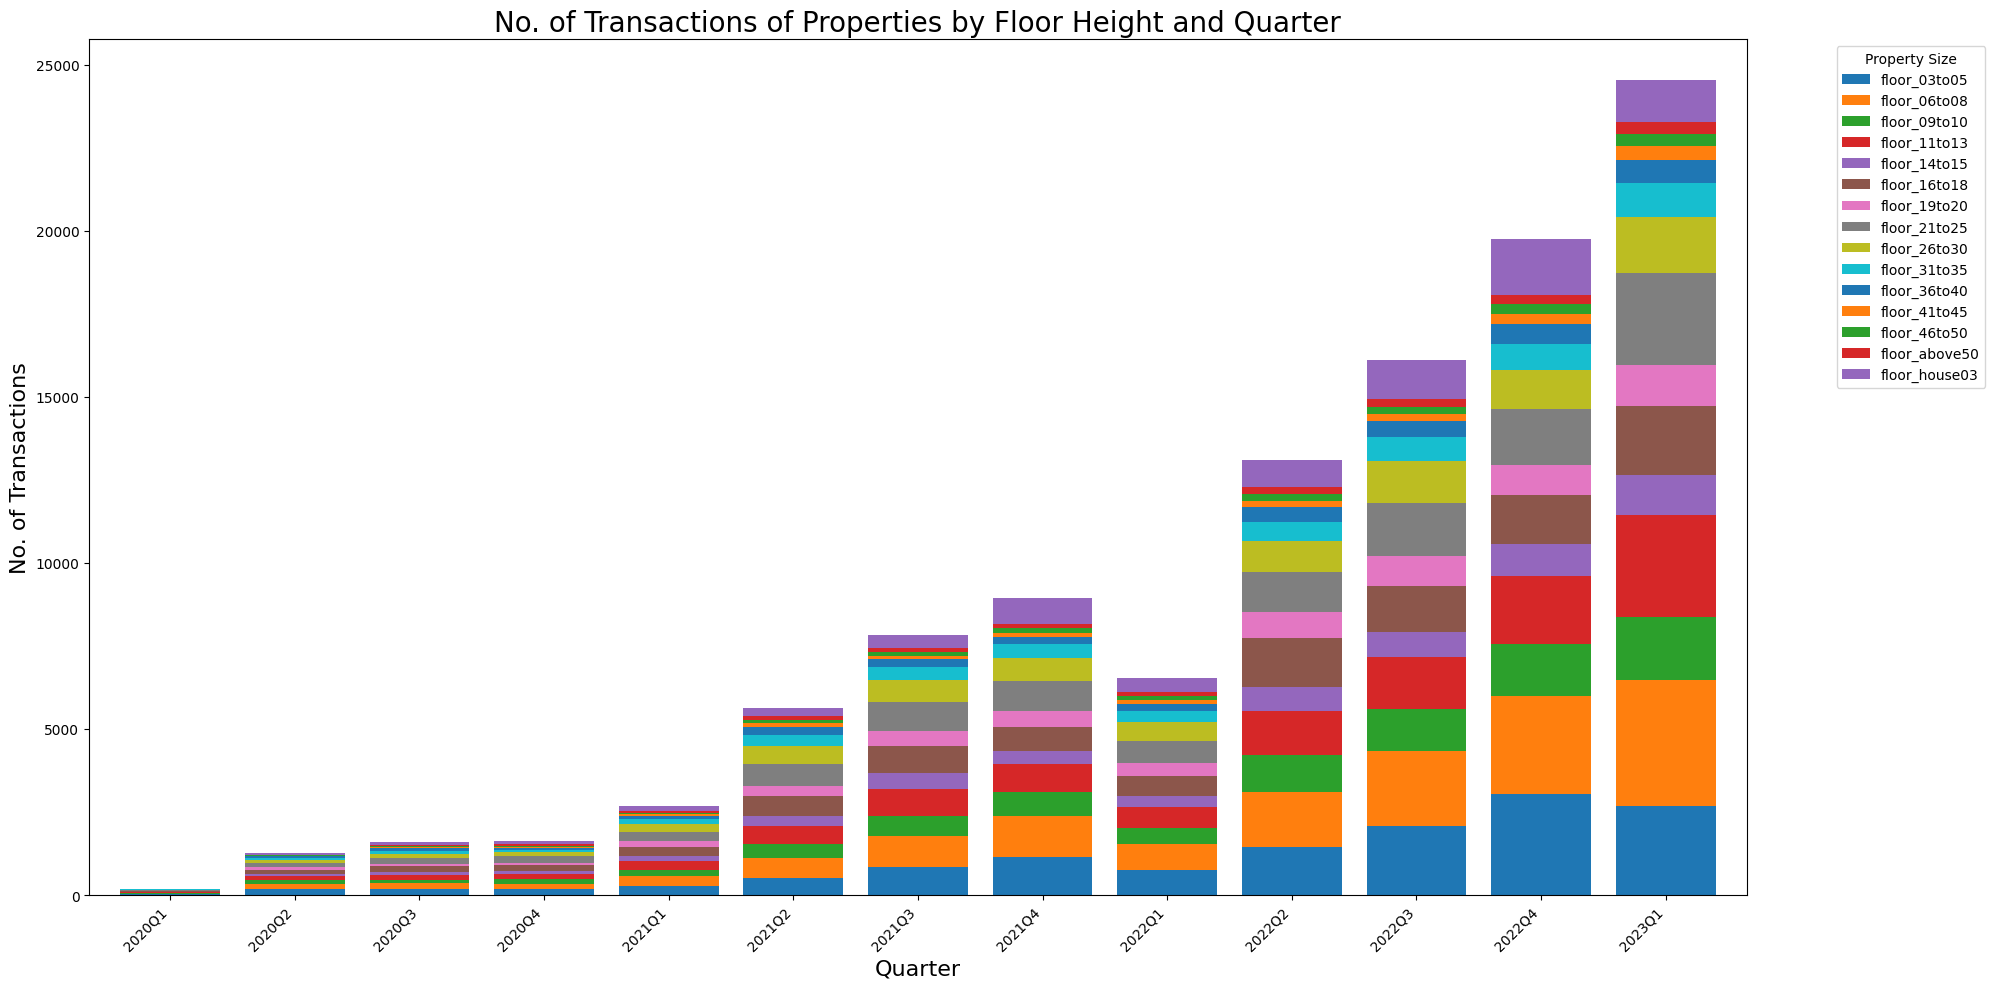

In [ ]:
# Group by YearQuarter and property_size, then count transactions
transaction_counts = merged_dataset.groupby(['YearQuarter', 'floor_height']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
plt.figure(figsize=(12, 10))  # Increased figure width
ax = transaction_counts.plot(kind='bar', stacked=True, figsize=(20, 10), width=0.8)  # Increased bar width

# Customizing the plot
plt.title('No. of Transactions of Properties by Floor Height and Quarter', fontsize=20)
plt.xlabel('Quarter', fontsize=16)
plt.ylabel('No. of Transactions', fontsize=16)
plt.legend(title='Property Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

# Show the plot
plt.show();

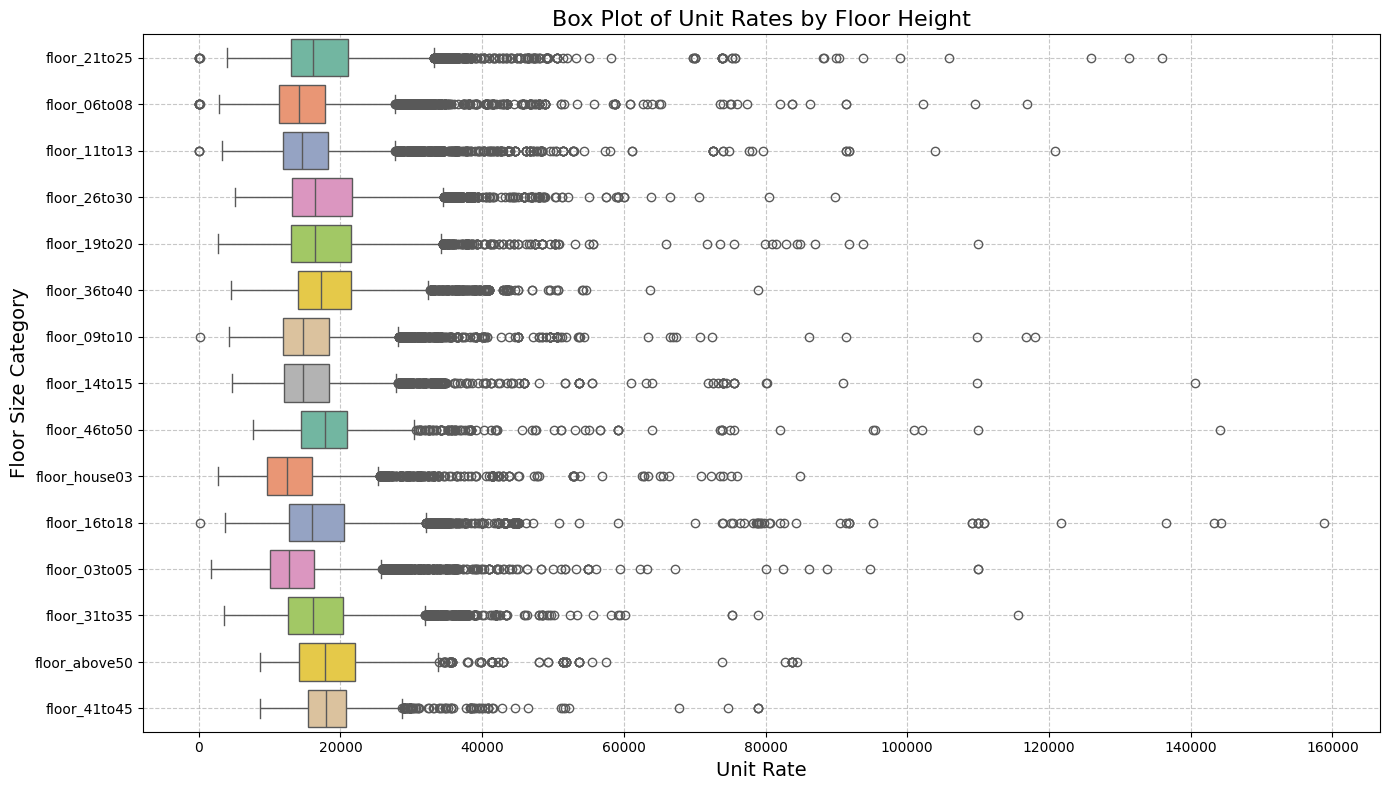

In [ ]:
# Plotting the box plot with updated syntax for future compatibility
plt.figure(figsize=(14, 8))  # Increase figure size for better readability

# Replace 'private_sold' with 'merged_dataset'
sns.boxplot(x='unit_rate', y='floor_height', data=merged_dataset, palette='Set2', hue=None, dodge=False)

# Customizing the plot
plt.title('Box Plot of Unit Rates by Floor Height', fontsize=16)
plt.xlabel('Unit Rate', fontsize=14)
plt.ylabel('Floor Size Category', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Display unique floor_size categories in the dataset
unique_floor_sizes = merged_dataset['floor_height'].unique()
print("Unique floor_size categories in the dataset:")
print(unique_floor_sizes)

# Alternatively, display the count of each floor_size category
floor_size_counts = merged_dataset['floor_height'].value_counts()
print("\nCount of each floor_size category in the dataset:")
print(floor_size_counts)

Unique floor_size categories in the dataset:
['floor_21to25' 'floor_06to08' 'floor_11to13' 'floor_26to30'
 'floor_19to20' 'floor_36to40' 'floor_09to10' 'floor_14to15'
 'floor_46to50' 'floor_house03' 'floor_16to18' 'floor_03to05'
 'floor_31to35' 'floor_above50' 'floor_41to45']

Count of each floor_size category in the dataset:
floor_height
floor_06to08     14972
floor_03to05     13347
floor_11to13     11563
floor_21to25     11153
floor_16to18      9898
floor_09to10      8667
floor_26to30      8082
floor_house03     7265
floor_19to20      5880
floor_14to15      5543
floor_31to35      4972
floor_36to40      3432
floor_above50     1728
floor_41to45      1693
floor_46to50      1656
Name: count, dtype: int64


# More GRAPHS AND DATA ANALYSIS

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Beautify matplotlib plots using rcParams
plt.rcParams.update({
    'figure.figsize': (10, 6),             # Set figure size
    'axes.titlesize': 16,                  # Title font size
    'axes.titleweight': 'bold',             # Title font weight
    'axes.labelsize': 14,                  # Axis label font size
    'axes.labelweight': 'bold',             # Axis label font weight
    'axes.grid': True,                     # Show grid
    'grid.alpha': 0.3,                     # Grid transparency
    'grid.linestyle': '--',                # Grid line style
    'xtick.labelsize': 12,                 # X-axis tick label font size
    'ytick.labelsize': 12,                 # Y-axis tick label font size
    'legend.fontsize': 12,                 # Legend font size
    'legend.loc': 'best',                  # Best location for the legend
    'font.family': 'serif',                # Font family
    'font.serif': ['Times New Roman'],     # Serif font for better readability
    'axes.facecolor': '#f0f0f0',           # Background color of the axes
    'figure.facecolor': 'white',           # Background color of the figure
    'savefig.dpi': 300,                    # Resolution of saved figure
    'savefig.transparent': True            # Transparent background for saved figure
})

# Use seaborn's default style for extra improvement
sns.set(style="whitegrid", palette="muted")


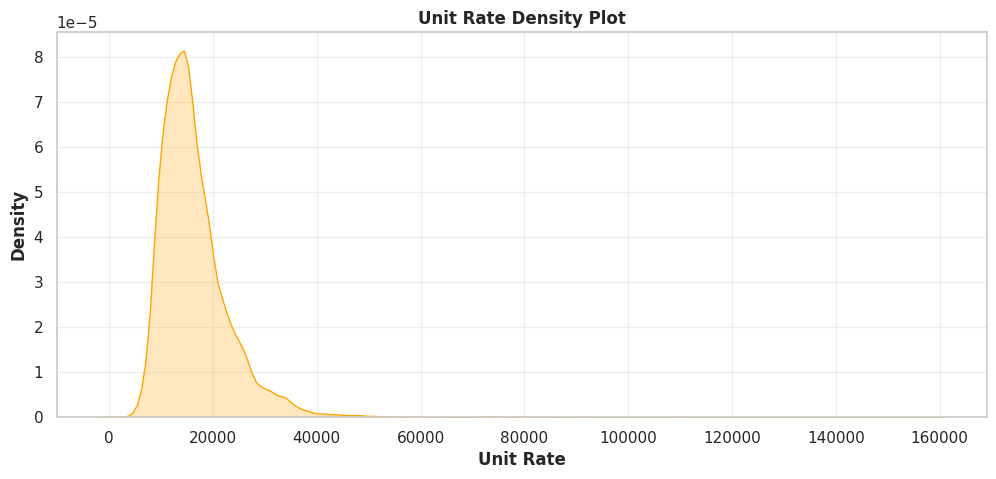

In [ ]:
plt.figure(figsize=(12, 5))
sns.kdeplot(merged_dataset['unit_rate'], shade=True, color='orange')
plt.title('Unit Rate Density Plot')
plt.xlabel('Unit Rate')
plt.ylabel('Density')
plt.show()

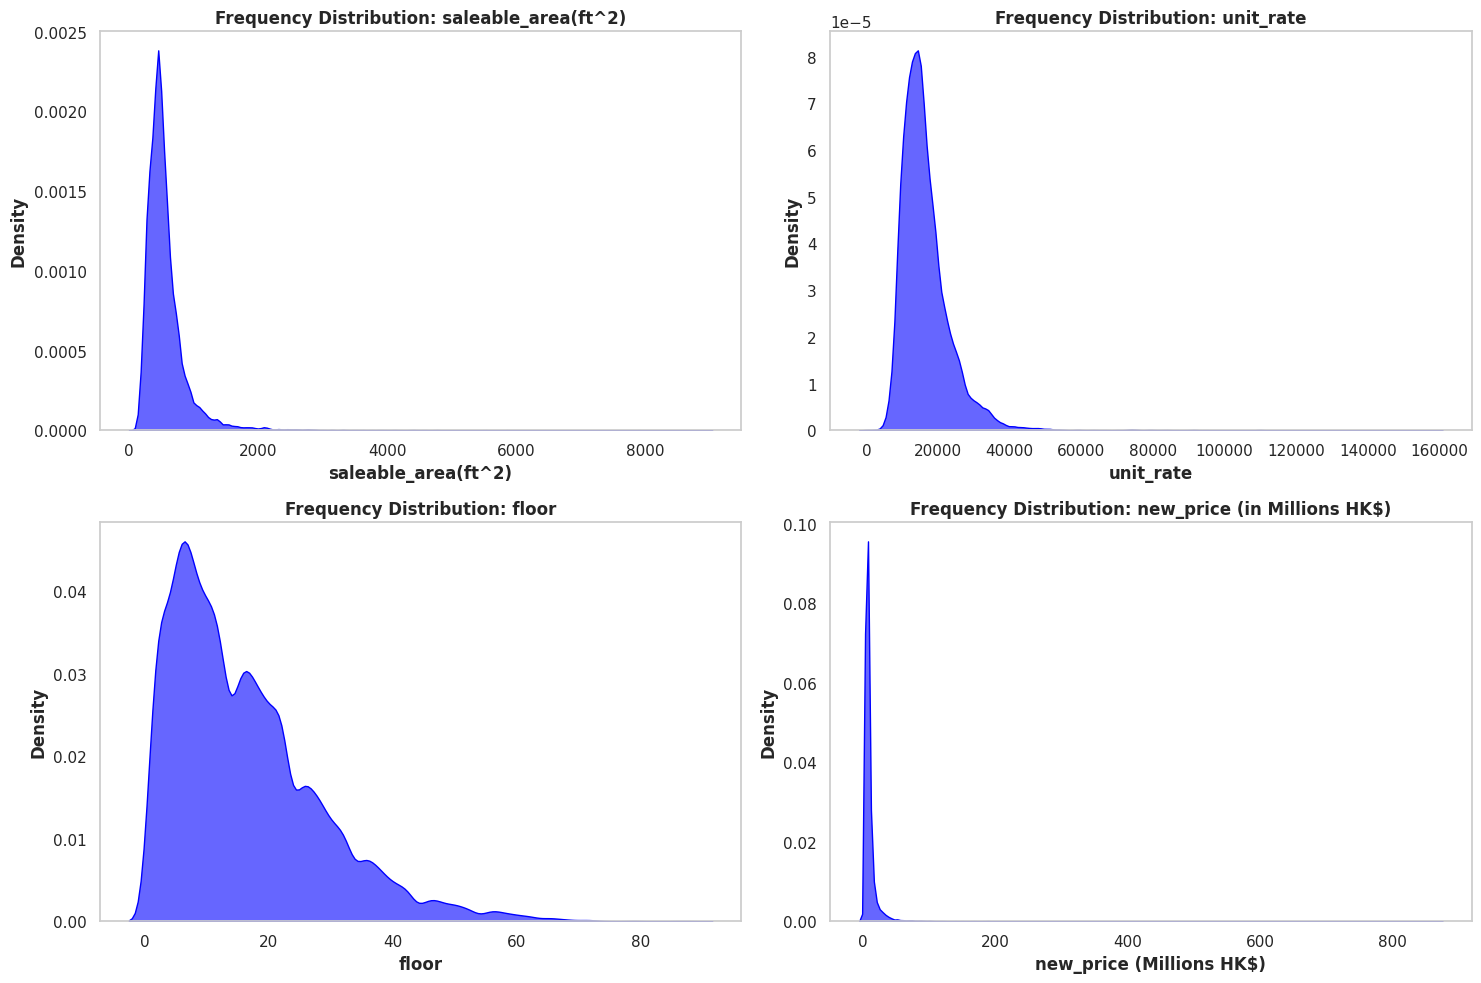

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical columns to plot
numerical_columns = ['saleable_area(ft^2)', 'unit_rate', 'floor', 'new_price']

# Filter existing columns from the dataset
columns_to_plot = [col for col in numerical_columns if col in merged_dataset.columns]

# Set up the figure and axes
plt.figure(figsize=(15, 10))

# Loop through each column and create a subplot
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)  # 2 rows, 2 columns layout

    # For new_price, divide values by 1,000,000 and update the label
    if column == 'new_price':
        sns.kdeplot(data=merged_dataset, x=merged_dataset['new_price'] / 1_000_000, fill=True, color='blue', alpha=0.6)
        plt.title('Frequency Distribution: new_price (in Millions HK$)')
        plt.xlabel('new_price (Millions HK$)')
    else:
        sns.kdeplot(data=merged_dataset, x=column, fill=True, color='blue', alpha=0.6)
        plt.title(f'Frequency Distribution: {column}')
        plt.xlabel(column)

    plt.ylabel('Density')
    plt.grid()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Scatter Plot of Saleable Area vs Unit Rate

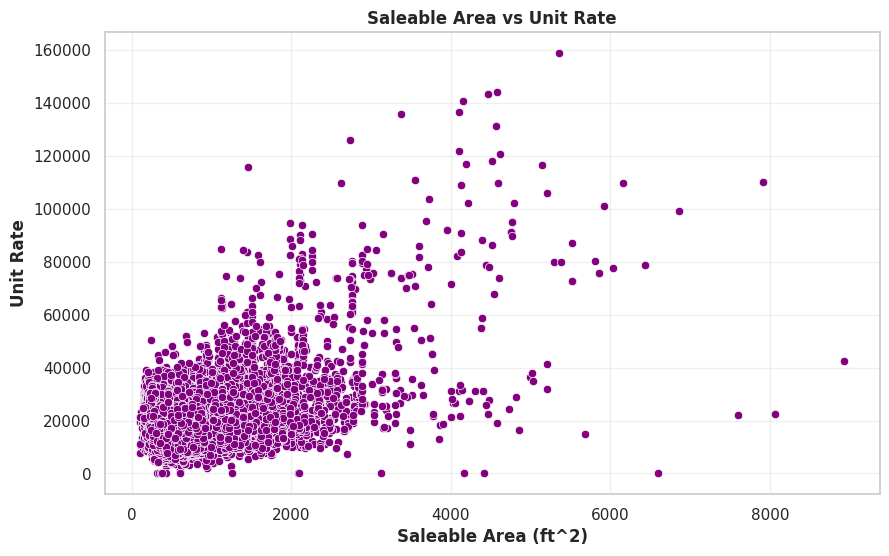

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_dataset['saleable_area(ft^2)'], y=merged_dataset['unit_rate'], color='purple')
plt.title('Saleable Area vs Unit Rate')
plt.xlabel('Saleable Area (ft^2)')
plt.ylabel('Unit Rate')
plt.show()

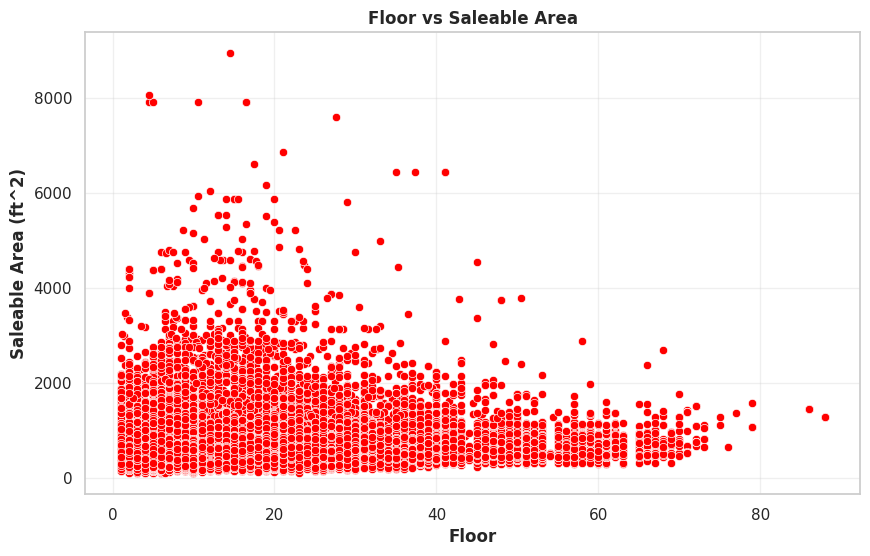

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_dataset['floor'], y=merged_dataset['saleable_area(ft^2)'], color='red')
plt.title('Floor vs Saleable Area')
plt.xlabel('Floor')
plt.ylabel('Saleable Area (ft^2)')
plt.show()

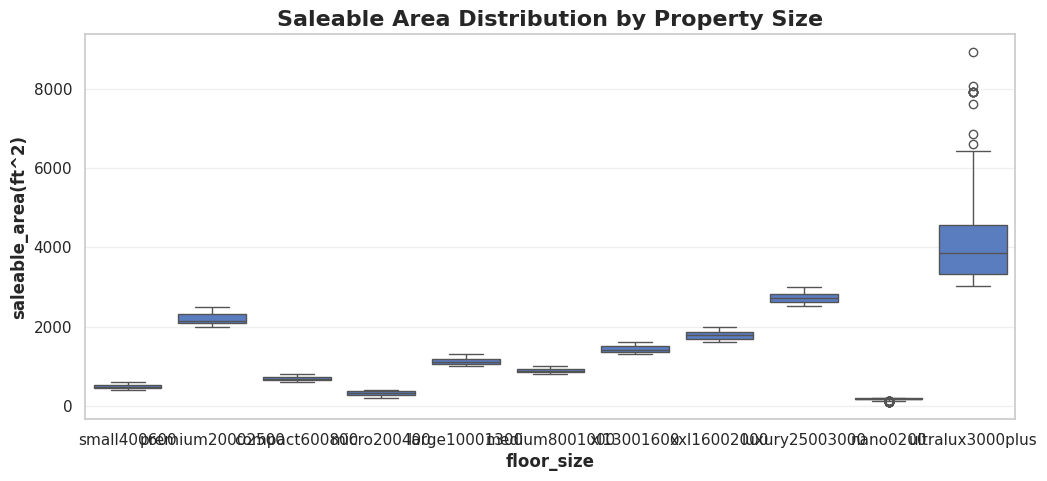

In [ ]:
# Boxplot to show distribution of 'saleable_area(ft^2)' by 'property_size'
plt.figure(figsize=(12, 5))
sns.boxplot(x='floor_size', y='saleable_area(ft^2)', data=merged_dataset)
plt.title('Saleable Area Distribution by Property Size', size=16)
plt.show()


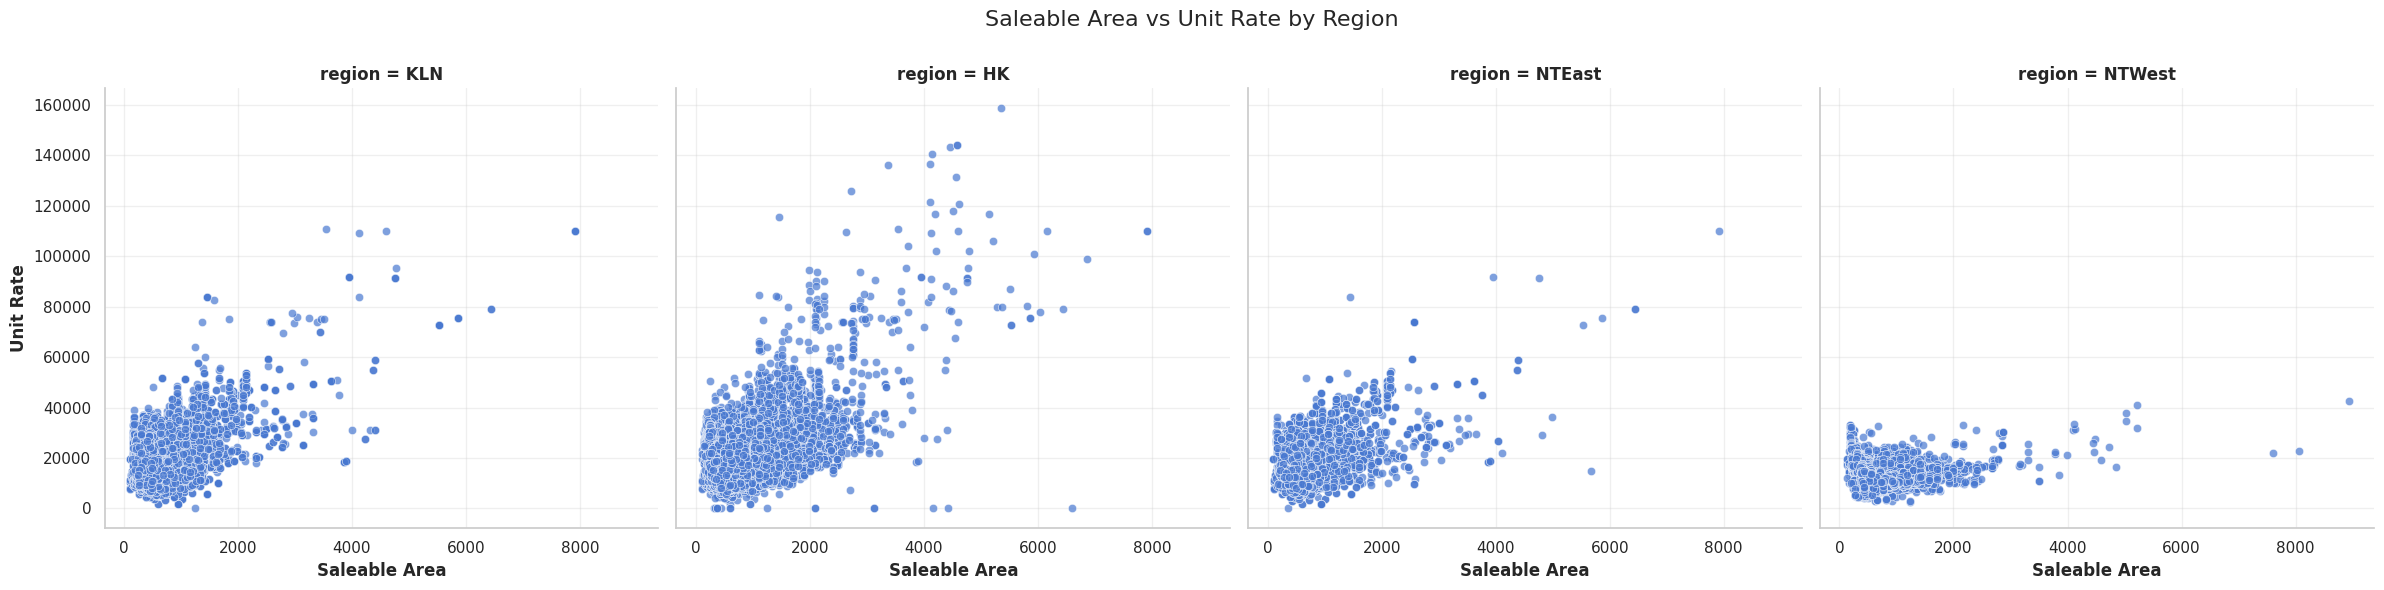

In [ ]:
g = sns.FacetGrid(merged_dataset, col="region", height=6)
g.map(sns.scatterplot, "saleable_area(ft^2)", "unit_rate", alpha=.7)
g.set_axis_labels("Saleable Area", "Unit Rate")
plt.suptitle("Saleable Area vs Unit Rate by Region", size=16)
plt.subplots_adjust(top=0.85)
plt.show()


### 3D Scatter Plot

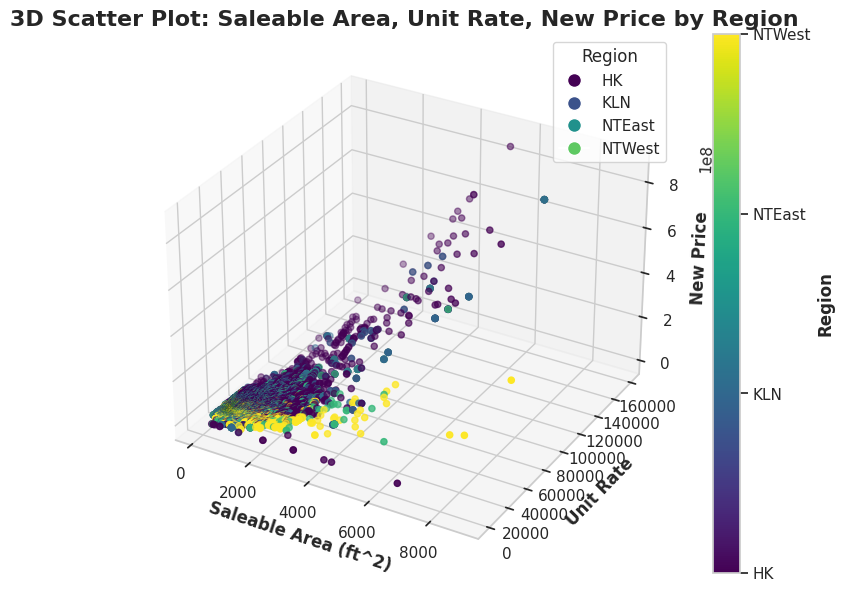

In [ ]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Convert 'region' to categorical and map categories to colors
merged_dataset['region_cat'] = pd.Categorical(merged_dataset['region'])
merged_dataset['region_color'] = merged_dataset['region_cat'].cat.codes

# Prepare 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot data with region_color for coloring
scatter = ax.scatter(merged_dataset['saleable_area(ft^2)'], merged_dataset['unit_rate'], merged_dataset['new_price'],
                     c=merged_dataset['region_color'], cmap='viridis')

# Labels and Title
ax.set_xlabel('Saleable Area (ft^2)')
ax.set_ylabel('Unit Rate')
ax.set_zlabel('New Price')
plt.title("3D Scatter Plot: Saleable Area, Unit Rate, New Price by Region", size=16)

# Add color bar for categorical region
colorbar = plt.colorbar(scatter, ax=ax, label='Region')
colorbar.set_ticks([0, 1, 2, 3])  # Set appropriate ticks based on unique region categories
colorbar.set_ticklabels(merged_dataset['region_cat'].cat.categories)  # Label ticks with region names

# Add a legend
region_labels = merged_dataset['region_cat'].cat.categories
region_colors = [scatter.cmap(i / float(len(region_labels))) for i in range(len(region_labels))]

# Create legend handles
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
           for color in region_colors]

# Create legend with region names
ax.legend(handles, region_labels, title="Region", loc="best")

plt.show()


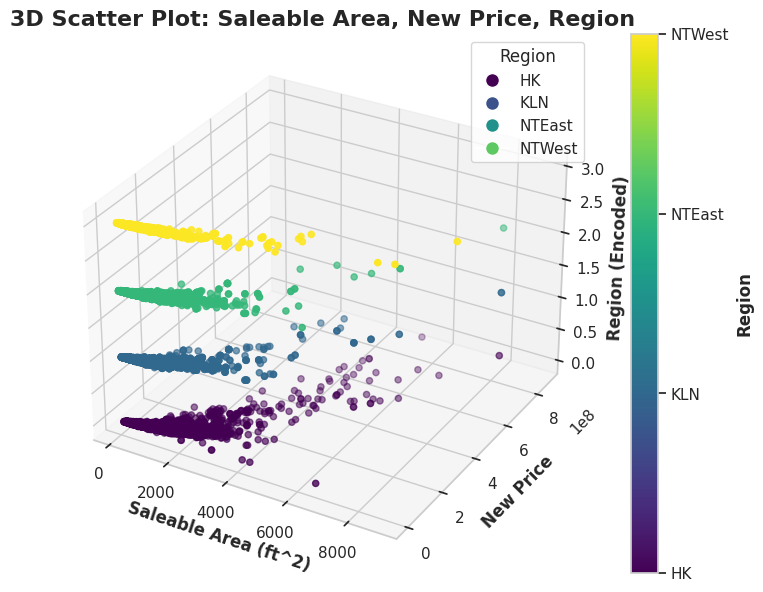

In [ ]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Convert 'region' to categorical and map categories to colors
merged_dataset['region_cat'] = pd.Categorical(merged_dataset['region'])
merged_dataset['region_color'] = merged_dataset['region_cat'].cat.codes

# Prepare 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot data with region_color for coloring
scatter = ax.scatter(
    merged_dataset['saleable_area(ft^2)'],
    merged_dataset['new_price'],
    merged_dataset['region_color'],  # Use region_color as the Z-axis
    c=merged_dataset['region_color'],
    cmap='viridis'
)

# Labels and Title
ax.set_xlabel('Saleable Area (ft^2)')
ax.set_ylabel('New Price')
ax.set_zlabel('Region (Encoded)')
plt.title("3D Scatter Plot: Saleable Area, New Price, Region", size=16)

# Add color bar for categorical region
colorbar = plt.colorbar(scatter, ax=ax, label='Region')
colorbar.set_ticks(range(len(merged_dataset['region_cat'].cat.categories)))  # Set appropriate ticks for each region
colorbar.set_ticklabels(merged_dataset['region_cat'].cat.categories)  # Label ticks with region names

# Add a legend
region_labels = merged_dataset['region_cat'].cat.categories
region_colors = [scatter.cmap(i / float(len(region_labels))) for i in range(len(region_labels))]

# Create legend handles
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
           for color in region_colors]

# Create legend with region names
ax.legend(handles, region_labels, title="Region", loc="best")

plt.show()

# Save the Dataframe

In [ ]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109851 entries, 0 to 109850
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   saleable_area(ft^2)  109851 non-null  int64         
 1   unit_rate            109851 non-null  int64         
 2   district             109851 non-null  object        
 3   floor                109851 non-null  float64       
 4   CPI                  109851 non-null  int64         
 5   PC                   109851 non-null  int64         
 6   IR                   109851 non-null  int64         
 7   MW                   109851 non-null  int64         
 8   M3                   109851 non-null  int64         
 9   SD                   109851 non-null  int64         
 10  UR                   109851 non-null  int64         
 11  GDP                  109851 non-null  int64         
 12  CI                   109851 non-null  int64         
 13  HSI           

In [ ]:
merged_dataset.shape

(109851, 29)

In [ ]:
# Mount Google Drive
from google.colab import drive
import os

drive.mount('/content/drive')

# Define the file path
file_path = '/content/drive/My Drive/Colab Notebooks/M5 Code and Data/Std_Datasetv3.csv'

# Save the file
merged_dataset.to_csv(file_path, index=False)

# Verify if the file exists
if os.path.exists(file_path):
    print(f"File 'Std_Datasetv3.csv' has been saved successfully!")
    print(f"Full file path: {file_path}")
else:
    print(f"File 'Std_Datasetv3.csv' was not found in the directory!")

# Optionally unmount and remount Google Drive
drive.flush_and_unmount()
print("Drive unmounted. Please refresh Google Drive and remount if necessary.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File 'Std_Datasetv3.csv' has been saved successfully!
Full file path: /content/drive/My Drive/Colab Notebooks/M5 Code and Data/Std_Datasetv3.csv
Drive unmounted. Please refresh Google Drive and remount if necessary.
